<a href="https://colab.research.google.com/github/Malathy-Lata/Bike-Sharing-Demand-Prediction_Regression_ML/blob/main/S_Malathy_Lata_Bike_Sharing_Demand_Prediction_Regression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: Bike Sharing Demand Prediction**

**Project Type:** Regression

**Contribution:** Individual

**Name:** Sabbavarapu Malathy Lata

# **Project Summary**

During the time of our analysis, we initially did EDA on all the features of our datset. We first analysed our dependent variable, 'Rented Bike Count' and also transformed it. Next we analysed categorical variable and dropped the variable who had majority of one class, we also analysed numerical variable, found out the correlation, distribution and their relationship with the dependent variable. We also removed some numerical features who had mostly 0 values and hot encoded the categorical variables.

7 machine learning algorithms are implemented, namely, Linear Regression, Lasso Regression, Ridge Regression, Elastic Net Regression, Decision Tree, Random Forest and Gradient Boosting. We did hyperparameter tuning to improve our model performance.

# **Github Link**

# **Problem Statement**

## **Problem description**

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## **Data Description**

### The dataset contains information regarding the number of bikes rented, Hour of the day, Date, Seasons, Holiday, Functional Day, and weather including Temperature, Humidity, Windspeed, Visibility, Dew Point Temperature, Solar Radiation, Snowfall, and Rainfall.

### **Attribute Information:**

* ### Rented Bike count - Number of bikes rented per hour
* ### Date : year-month-day
* ### Hour - Hour of the day (0-23)
* ### Temperature-Temperature of the day in Celsius
* ### Humidity - Humidity measure in %
* ### Windspeed - Windspeed measure in m/s
* ### Visibility - Visibility measure 10m
* ### Dew point temperature - Dew point temperature in Celsius
* ### Solar radiation - Solar Radiation measure in MJ/m2
* ### Rainfall - Rainfall in mm
* ### Snowfall - Snowfall in cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Whether a holiday or not
* ### Functional Day - Whether a functional day or not

# **Let's Begin**

## **Knowing the Data**

In [68]:
#Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import skew

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

import warnings
warnings.filterwarnings("ignore")

In [69]:
#Mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
#Loading the adtaset
bike_sharing_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regression Capstone Project- 2/SeoulBikeData.csv', encoding = 'latin')

In [71]:
#First 5 rows of the dataset
bike_sharing_df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [72]:
#Last 5 rows of the dataset
bike_sharing_df.tail()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes

In [73]:
#Shape of the dataset
bike_sharing_df.shape

(8760, 14)

In [74]:
#List of various columns
bike_sharing_df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [75]:
#Summary of the data
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [76]:
#Null values in the dataset
bike_sharing_df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [77]:
#duplicated values in the dataset
bike_sharing_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool

1.   The dataset consists of 8760 rows and 14 columns
2.   The datatypes present are object, integer and float
3.   There are no null and duplicated values in the dataset

## **Understanding the Variables**

In [78]:
#Statistical description of the dataset
bike_sharing_df.describe(include='all').T

count unique         top  freq         mean  \
Date                         8760    365  01/12/2017    24          NaN   
Rented Bike Count          8760.0    NaN         NaN   NaN   704.602055   
Hour                       8760.0    NaN         NaN   NaN         11.5   
Temperature(°C)            8760.0    NaN         NaN   NaN    12.882922   
Humidity(%)                8760.0    NaN         NaN   NaN    58.226256   
Wind speed (m/s)           8760.0    NaN         NaN   NaN     1.724909   
Visibility (10m)           8760.0    NaN         NaN   NaN  1436.825799   
Dew point temperature(°C)  8760.0    NaN         NaN   NaN     4.073813   
Solar Radiation (MJ/m2)    8760.0    NaN         NaN   NaN     0.569111   
Rainfall(mm)               8760.0    NaN         NaN   NaN     0.148687   
Snowfall (cm)              8760.0    NaN         NaN   NaN     0.075068   
Seasons                      8760      4      Spring  2208          NaN   
Holiday                      8760      2  No Holiday  8328          NaN   
Functioning Day              8760      2         Yes  8465          NaN   

                                  std   min    25%     50%      75%     max  
Date                              NaN   NaN    NaN     NaN      NaN     NaN  
Rented Bike Count          644.997468   0.0  191.0   504.5  1065.25  3556.0  
Hour                         6.922582   0.0   5.75    11.5    17.25    23.0  
Temperature(°C)             11.944825 -17.8    3.5    13.7     22.5    39.4  
Humidity(%)                 20.362413   0.0   42.0    57.0     74.0    98.0  
Wind speed (m/s)               1.0363   0.0    0.9     1.5      2.3     7.4  
Visibility (10m)           608.298712  27.0  940.0  1698.0   2000.0  2000.0  
Dew point temperature(°C)   13.060369 -30.6   -4.7     5.1     14.8    27.2  
Solar Radiation (MJ/m2)      0.868746   0.0    0.0    0.01     0.93    3.52  
Rainfall(mm)                 1.128193   0.0    0.0     0.0      0.0    35.0  
Snowfall (cm)                0.436746   0.0    0.0     0.0      0.0     8.8  
Seasons                           NaN   NaN    NaN     NaN      NaN     NaN  
Holiday                           NaN   NaN    NaN     NaN      NaN     NaN  
Functioning Day                   NaN   NaN    NaN     NaN      NaN     NaN

In [79]:
#number of unique values for each column
for i in bike_sharing_df.columns:
  print(f"No. of unique values in {i} is {bike_sharing_df[i].nunique()}")

No. of unique values in Date is 365
No. of unique values in Rented Bike Count is 2166
No. of unique values in Hour is 24
No. of unique values in Temperature(°C) is 546
No. of unique values in Humidity(%) is 90
No. of unique values in Wind speed (m/s) is 65
No. of unique values in Visibility (10m) is 1789
No. of unique values in Dew point temperature(°C) is 556
No. of unique values in Solar Radiation (MJ/m2) is 345
No. of unique values in Rainfall(mm) is 61
No. of unique values in Snowfall (cm) is 51
No. of unique values in Seasons is 4
No. of unique values in Holiday is 2
No. of unique values in Functioning Day is 2


In [80]:
#Unique values of column seasons
bike_sharing_df['Seasons'].unique()

array(['Winter', 'Spring', 'Summer', 'Autumn'], dtype=object)

In [81]:
#Number of each unique value for column seasons
bike_sharing_df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [82]:
#Unique values of column holiday
bike_sharing_df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [83]:
#Unique values of column functioning day
bike_sharing_df['Functioning Day'].unique()

array(['Yes', 'No'], dtype=object)

# **Data Wrangling**

**Converting to appropriate data types for required columns**



In [84]:
# Changing the date column to datatype datetime
bike_sharing_df['Date'] = bike_sharing_df['Date'].apply (lambda x:
                                                         dt.datetime.strptime(x,"%d/%m/%Y"))

In [85]:
#Extracting the day, month, and year from the date column
bike_sharing_df['year'] = bike_sharing_df['Date'].dt.year
bike_sharing_df['month'] = bike_sharing_df['Date'].dt.month
bike_sharing_df['day'] = bike_sharing_df['Date'].dt.day_name()

In [86]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
bike_sharing_df['weekdays_weekend']=bike_sharing_df['day'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
bike_sharing_df=bike_sharing_df.drop(columns=['Date','day','year'],axis=1)

For analysing whether there is high demand for bike rental over weekend or weekdays, a column pertaining to such information is created using the extracted values of the column date

In [87]:
#Change the int64 column into category column
cols=['Hour','month','weekdays_weekend']
for col in cols:
  bike_sharing_df[col]=bike_sharing_df[col].astype('category')

In [88]:
#Rename the columns name
bike_sharing_df= bike_sharing_df.rename(columns={'Rented Bike Count':'Rented_Bike_Count',
                                'Temperature(°C)':'Temperature',
                                'Humidity(%)':'Humidity',
                                'Wind speed (m/s)':'Wind_speed',
                                'Visibility (10m)':'Visibility',
                                'Dew point temperature(°C)':'Dew_point_temperature',
                                'Solar Radiation (MJ/m2)':'Solar_Radiation',
                                'Rainfall(mm)':'Rainfall',
                                'Snowfall (cm)':'Snowfall',
                                'Functioning Day':'Functioning_Day'})

In [89]:
#Rechecking the columns names after updation
bike_sharing_df.columns

Index(['Rented_Bike_Count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temperature', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [90]:
#First 3 rows of the dataset
bike_sharing_df.head(3)

Rented_Bike_Count Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254    0         -5.2        37         2.2        2000   
1                204    1         -5.5        38         0.8        2000   
2                173    2         -6.0        39         1.0        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day month weekdays_weekend  
0  No Holiday             Yes    12                0  
1  No Holiday             Yes    12                0  
2  No Holiday             Yes    12                0

# **Exploratory Data Analysis**

## **Analysis of Correlation**

**Correlation Coefficient**

Correlation is a measure of the linear relationship of 2 or more variables. Through correlation, we can predict one variable from the other. The logic behind using correlation for feature selection is that the good variables are highly correlated with the target. Furthermore, variables should be correlated with the target but should be uncorrelated among themselves.

### **By Correlation Heatmap**

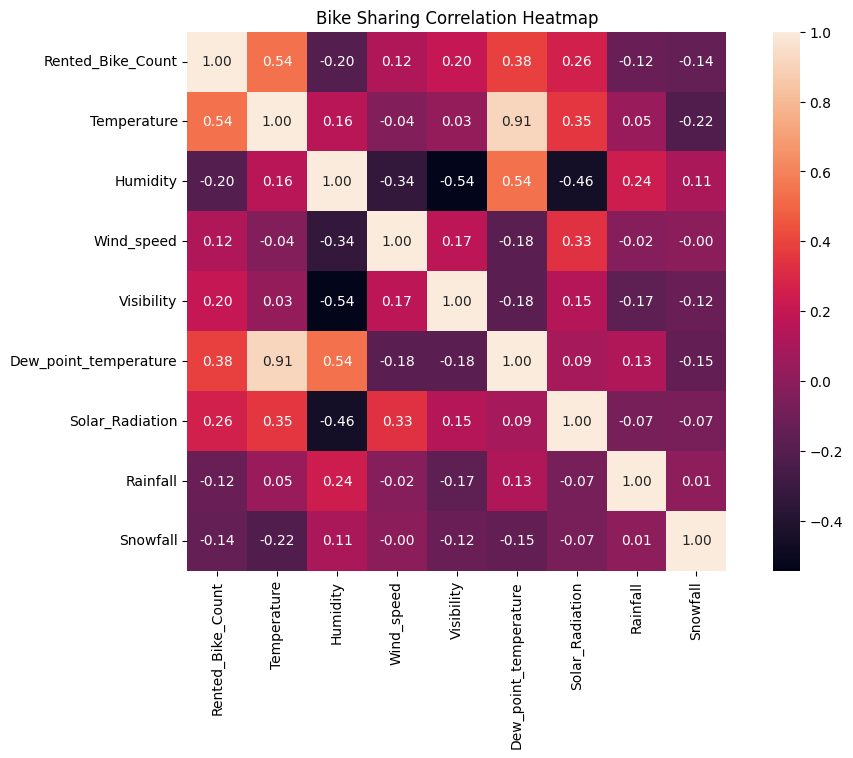

In [91]:
#correlation matrix of bike sharing
corrmat = bike_sharing_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=1, square=True);
plt.title('Bike Sharing Correlation Heatmap')
plt.show()

From the heatmap, we can observe that the most positively correlated variables to the rented bike count are :

* temperature
* dew point temperature

The most negatively correlated variable is Humidity.

### **By OLS Method**

Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable

In [92]:
#import the module
#assign the 'x','y' value
import statsmodels.api as sm
X = bike_sharing_df[[ 'Temperature','Humidity',
       'Wind_speed', 'Visibility','Dew_point_temperature',
       'Solar_Radiation', 'Rainfall', 'Snowfall']]
Y = bike_sharing_df['Rented_Bike_Count']

In [93]:
#adding a constant column
X = sm.add_constant(X)
X

const  Temperature  Humidity  Wind_speed  Visibility  \
0       1.0         -5.2        37         2.2        2000   
1       1.0         -5.5        38         0.8        2000   
2       1.0         -6.0        39         1.0        2000   
3       1.0         -6.2        40         0.9        2000   
4       1.0         -6.0        36         2.3        2000   
...     ...          ...       ...         ...         ...   
8755    1.0          4.2        34         2.6        1894   
8756    1.0          3.4        37         2.3        2000   
8757    1.0          2.6        39         0.3        1968   
8758    1.0          2.1        41         1.0        1859   
8759    1.0          1.9        43         1.3        1909   

      Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall  
0                     -17.6              0.0       0.0       0.0  
1                     -17.6              0.0       0.0       0.0  
2                     -17.7              0.0       0.0       0.0  
3                     -17.6              0.0       0.0       0.0  
4                     -18.6              0.0       0.0       0.0  
...                     ...              ...       ...       ...  
8755                  -10.3              0.0       0.0       0.0  
8756                   -9.9              0.0       0.0       0.0  
8757                   -9.9              0.0       0.0       0.0  
8758                   -9.8              0.0       0.0       0.0  
8759                   -9.3              0.0       0.0       0.0  

[8760 rows x 9 columns]

In [94]:
## OLS Model fitting
model= sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Rented_Bike_Count   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.397
Method:                 Least Squares   F-statistic:                     723.1
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        09:43:29   Log-Likelihood:                -66877.
No. Observations:                8760   AIC:                         1.338e+05
Df Residuals:                    8751   BIC:                         1.338e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   844.6495    106.296      7.946      0.000     636.285    1053.014
Temperature              36.5270      4.169      8.762      0.000      28.355      44.699
Humidity                -10.5077      1.184     -8.872      0.000     -12.829      -8.186
Wind_speed               52.4810      5.661      9.271      0.000      41.385      63.577
Visibility               -0.0097      0.011     -0.886      0.376      -0.031       0.012
Dew_point_temperature    -0.7829      4.402     -0.178      0.859      -9.411       7.846
Solar_Radiation        -118.9772      8.670    -13.724      0.000    -135.971    -101.983
Rainfall                -50.7083      4.932    -10.282      0.000     -60.376     -41.041
Snowfall                 41.0307     12.806      3.204      0.001      15.929      66.133
==============================================================================
Omnibus:                      957.371   Durbin-Watson:                   0.338
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1591.019
Skew:                           0.769   Prob(JB):                         0.00
Kurtosis:                       4.412   Cond. No.                     3.11e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [95]:
#Checking the correlation values
X.corr()

const  Temperature  Humidity  Wind_speed  Visibility  \
const                    NaN          NaN       NaN         NaN         NaN   
Temperature              NaN     1.000000  0.159371   -0.036252    0.034794   
Humidity                 NaN     0.159371  1.000000   -0.336683   -0.543090   
Wind_speed               NaN    -0.036252 -0.336683    1.000000    0.171507   
Visibility               NaN     0.034794 -0.543090    0.171507    1.000000   
Dew_point_temperature    NaN     0.912798  0.536894   -0.176486   -0.176630   
Solar_Radiation          NaN     0.353505 -0.461919    0.332274    0.149738   
Rainfall                 NaN     0.050282  0.236397   -0.019674   -0.167629   
Snowfall                 NaN    -0.218405  0.108183   -0.003554   -0.121695   

                       Dew_point_temperature  Solar_Radiation  Rainfall  \
const                                    NaN              NaN       NaN   
Temperature                         0.912798         0.353505  0.050282   
Humidity                            0.536894        -0.461919  0.236397   
Wind_speed                         -0.176486         0.332274 -0.019674   
Visibility                         -0.176630         0.149738 -0.167629   
Dew_point_temperature               1.000000         0.094381  0.125597   
Solar_Radiation                     0.094381         1.000000 -0.074290   
Rainfall                            0.125597        -0.074290  1.000000   
Snowfall                           -0.150887        -0.072301  0.008500   

                       Snowfall  
const                       NaN  
Temperature           -0.218405  
Humidity               0.108183  
Wind_speed            -0.003554  
Visibility            -0.121695  
Dew_point_temperature -0.150887  
Solar_Radiation       -0.072301  
Rainfall               0.008500  
Snowfall               1.000000

*   From the OLS model too the 'Temperature' and 'Dew_point_temperature' are highly correlated, so either of thye column needs to be dropped.
*   Before droping we need to check the (P>|t|) value from the model summary table from which it is evident that the 'Dew_point_temperature' value is higher so Dew_point_temperature column needs to be dropped.
*   Both the correlation heatmap and the OLS model exhibit similar results.



## **Analysis of Numerical Variables**

In [96]:
#assigning numerical coulmns
numerical_variables=list(bike_sharing_df.select_dtypes(['int64','float64']).columns)
numerical_variables

['Rented_Bike_Count',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Dew_point_temperature',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall']

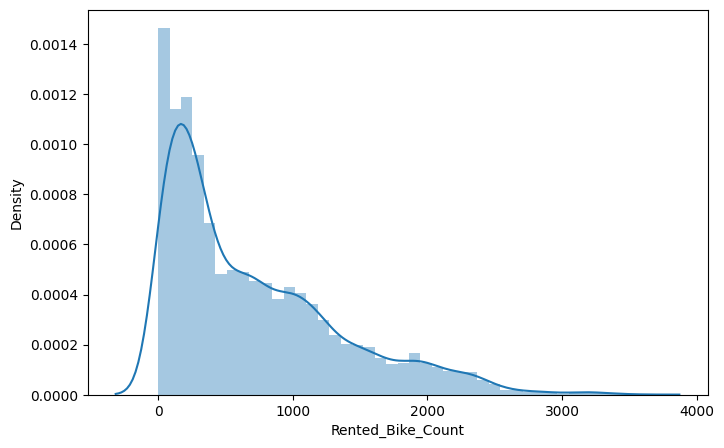

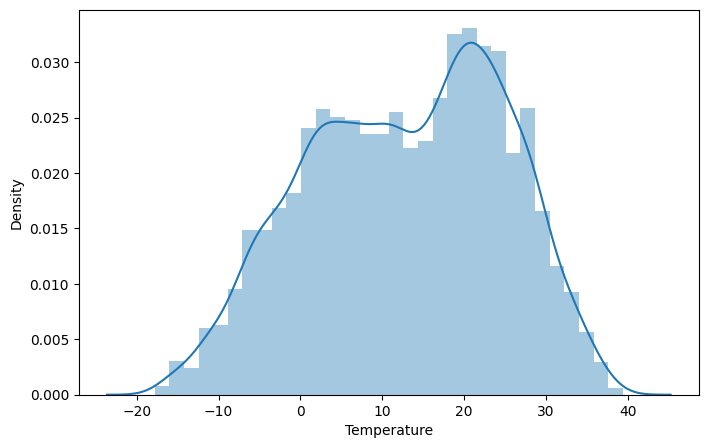

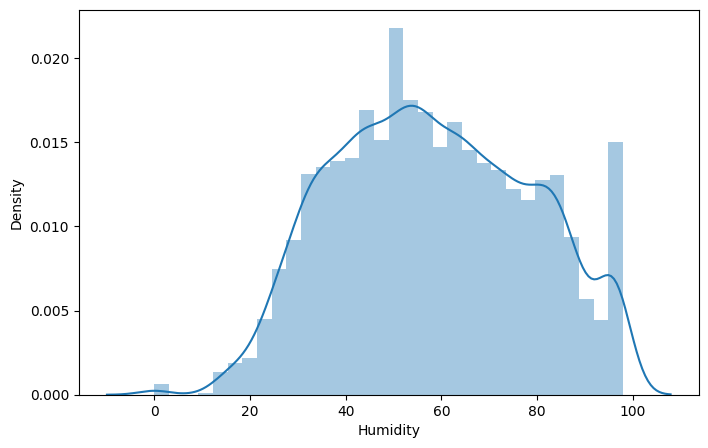

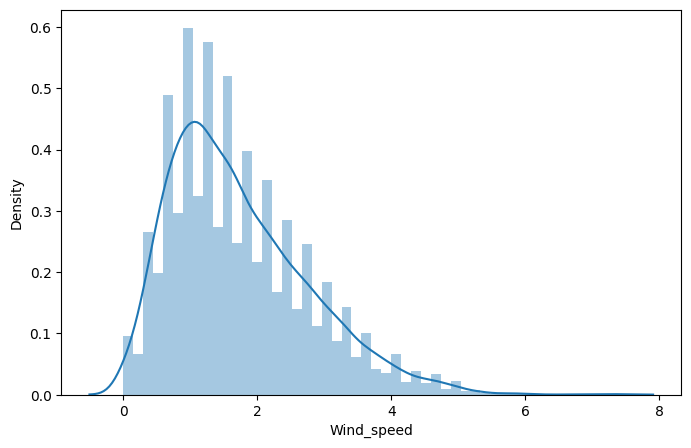

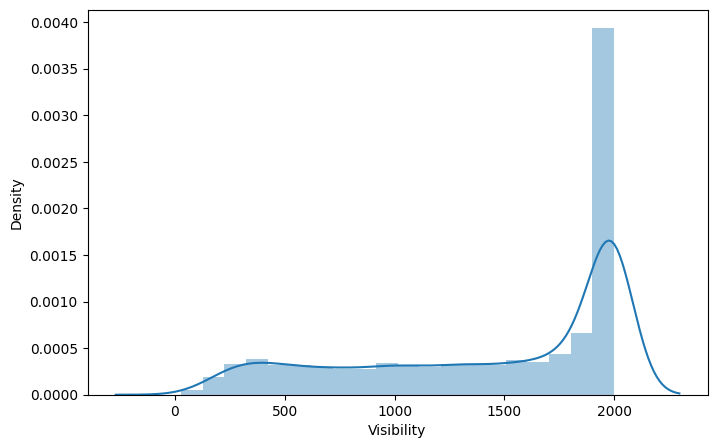

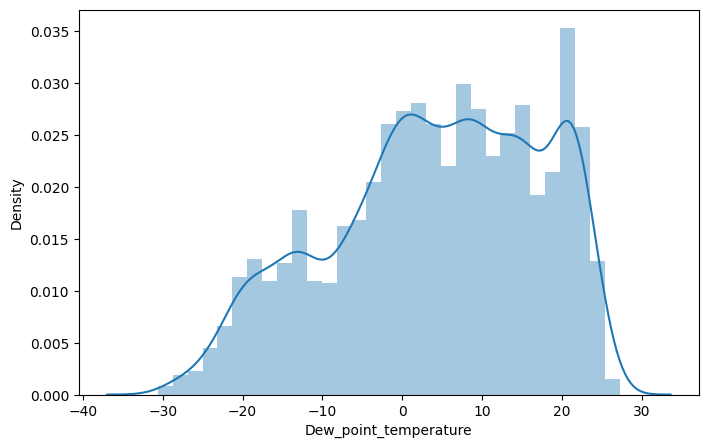

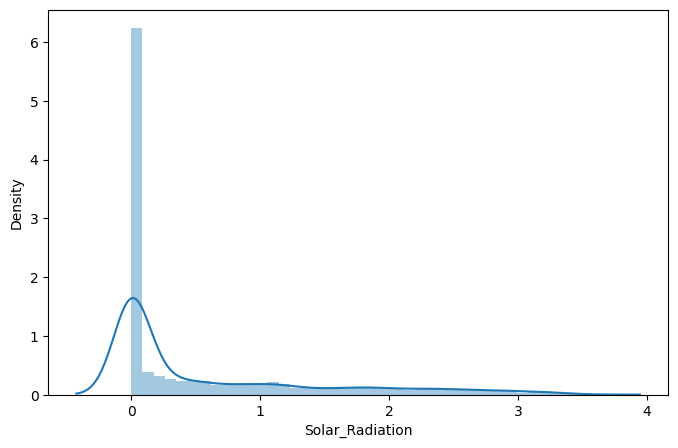

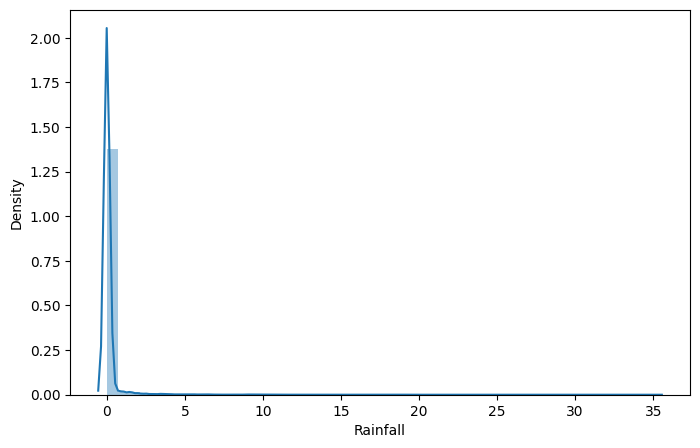

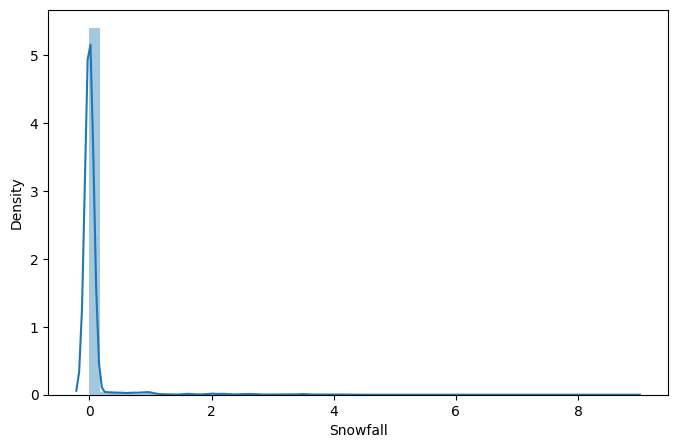

In [97]:
#printing displots to analyze the distribution of all numerical features
for col in numerical_variables:
  plt.figure(figsize=(8,5))
  sns.distplot(x=bike_sharing_df[col])
  plt.xlabel(col)
plt.show()

<Axes: xlabel='Solar_Radiation'>

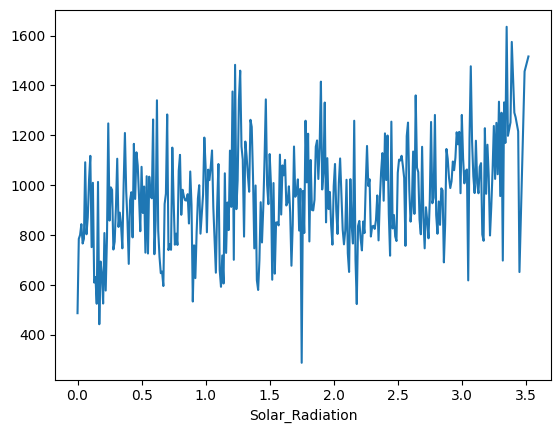

In [98]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Solar_Radiation"
bike_sharing_df.groupby('Solar_Radiation').mean()['Rented_Bike_Count'].plot()

<Axes: xlabel='Snowfall'>

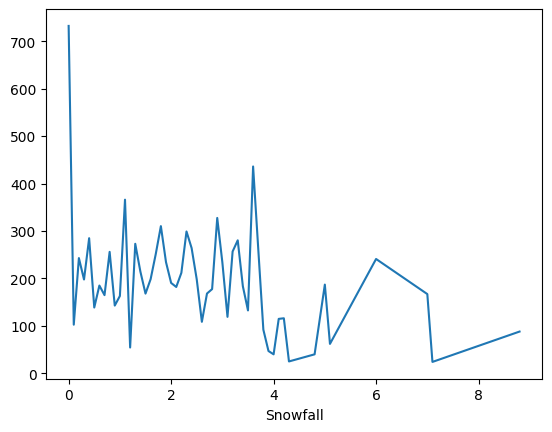

In [99]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Snowfall"
bike_sharing_df.groupby('Snowfall').mean()['Rented_Bike_Count'].plot()

<Axes: xlabel='Rainfall'>

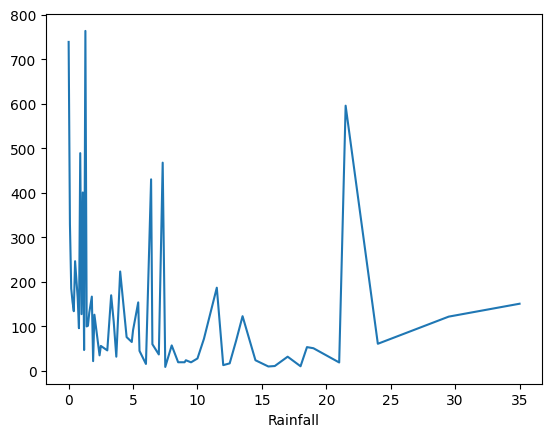

In [100]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Rainfall"
bike_sharing_df.groupby('Rainfall').mean()['Rented_Bike_Count'].plot()

<Axes: xlabel='Wind_speed'>

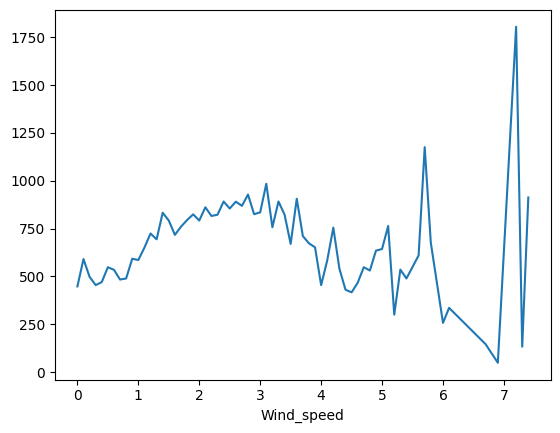

In [101]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Wind_speed"
bike_sharing_df.groupby('Wind_speed').mean()['Rented_Bike_Count'].plot()

<Axes: xlabel='Temperature'>

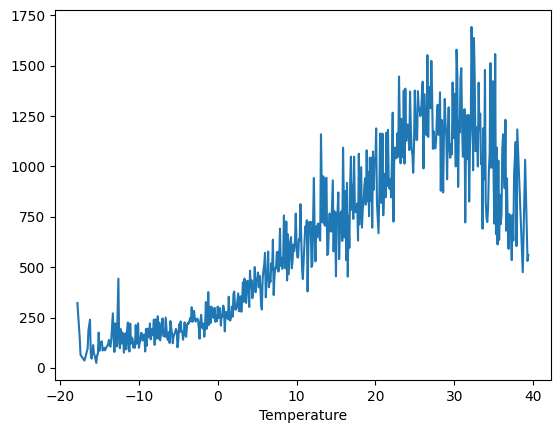

In [102]:
#print the plot to analyze the relationship between "Rented_Bike_Count" and "Temperature"
bike_sharing_df.groupby('Temperature').mean()['Rented_Bike_Count'].plot()

## **Bivariate** **Analysis**

In [103]:
#Grouping the data by number of bikes rented
def rented_bike_analysis_df(col):
  return bike_sharing_df.groupby(col)['Rented_Bike_Count'].sum().reset_index()

  Functioning_Day  Rented_Bike_Count
0              No                  0
1             Yes            6172314


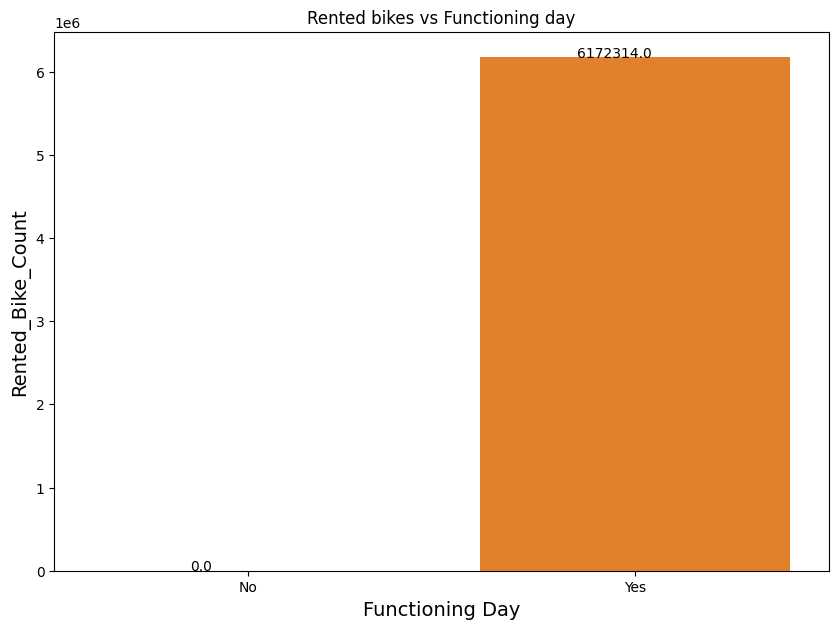

In [104]:
#Functioning day column
Functioning_Day_col = rented_bike_analysis_df('Functioning_Day')
print (Functioning_Day_col)
#Plotting functioning day vs Rented bike count
plt.figure(figsize=(10,7))
ax=sns.barplot(data=Functioning_Day_col,x='Functioning_Day',y='Rented_Bike_Count')
plt.xlabel("Functioning Day", size=14)
plt.ylabel("Rented_Bike_Count", size=14)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("Rented bikes vs Functioning day")
plt.show()

  weekdays_weekend  Rented_Bike_Count
0                0            4506628
1                1            1665686


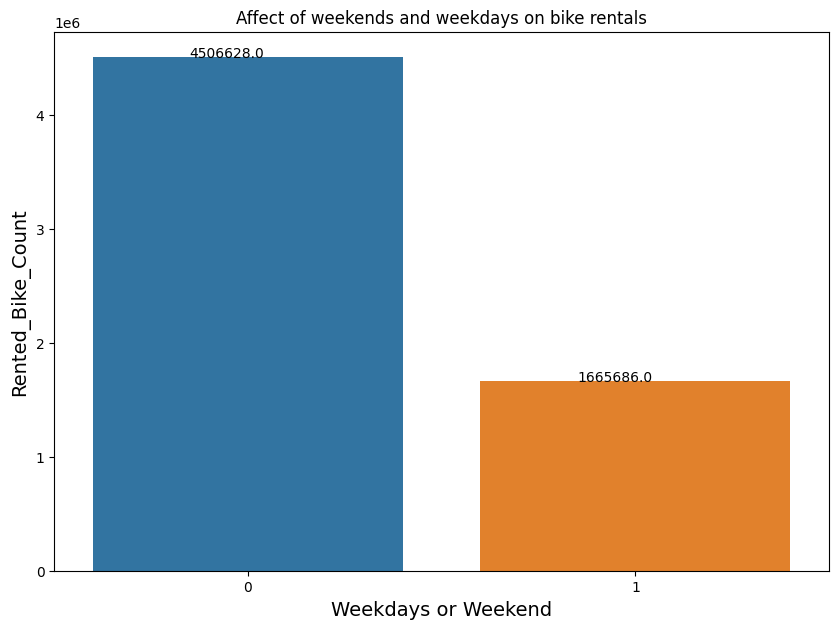

In [105]:
#Weekdays and weekends column
weekdays_weekends_col = rented_bike_analysis_df('weekdays_weekend')
print (weekdays_weekends_col)
#Plotting the values
plt.figure(figsize=(10,7))
ax=sns.barplot(data=weekdays_weekends_col,x='weekdays_weekend',y='Rented_Bike_Count')
plt.xlabel("Weekdays or Weekend", size=14)
plt.ylabel("Rented_Bike_Count", size=14)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("Affect of weekends and weekdays on bike rentals")
plt.show()

   Hour  Rented_Bike_Count
0     0             197633
1     1             155557
2     2             110095
3     3              74216
4     4              48396
5     5              50765
6     6             104961
7     7             221192
8     8             370731
9     9             235784
10   10             192655
11   11             219311
12   12             255296
13   13             267635
14   14             276971
15   15             302653
16   16             339677
17   17             415556
18   18             548568
19   19             436229
20   20             390172
21   21             376479
22   22             336821
23   23             244961


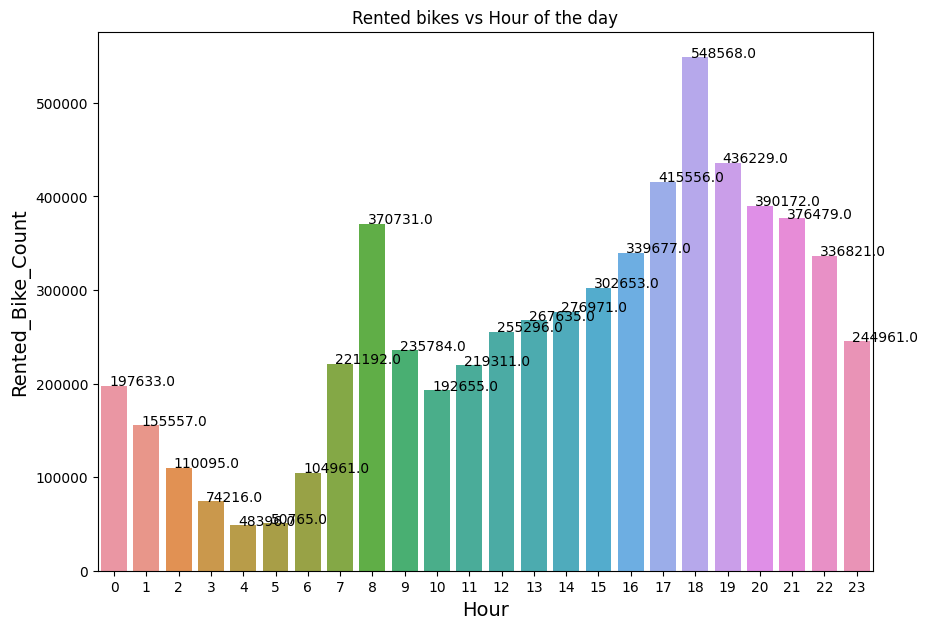

In [106]:
#Hours column
hours_col = rented_bike_analysis_df('Hour')
print(hours_col)
#Plotting the values
plt.figure(figsize=(10,7))
ax=sns.barplot(data=hours_col,x='Hour',y='Rented_Bike_Count')
plt.xlabel("Hour", size=14)
plt.ylabel("Rented_Bike_Count", size=14)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("Rented bikes vs Hour of the day")
plt.show()

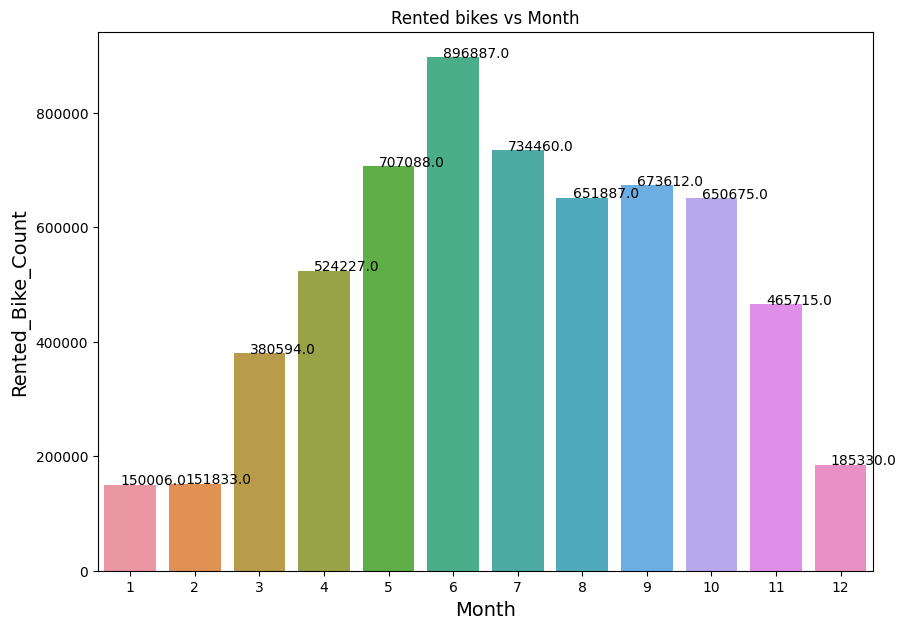

In [107]:
#Month column
month_col = rented_bike_analysis_df('month')
month_col
#Plotting the values
plt.figure(figsize=(10,7))
ax=sns.barplot(data=month_col,x='month',y='Rented_Bike_Count')
plt.xlabel("Month", size=14)
plt.ylabel("Rented_Bike_Count", size=14)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("Rented bikes vs Month")
plt.show()

In [108]:
#Seasons column
seasons_col = rented_bike_analysis_df('Seasons')
seasons_col

Seasons  Rented_Bike_Count
0  Autumn            1790002
1  Spring            1611909
2  Summer            2283234
3  Winter             487169

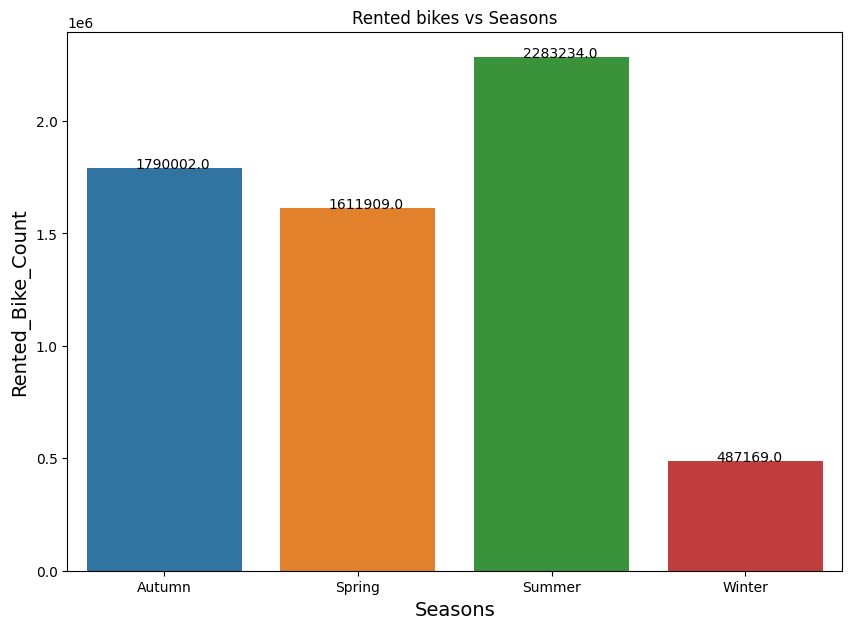

In [109]:
#Plotting the seasons vs bike rental values
plt.figure(figsize=(10,7))
ax=sns.barplot(data=seasons_col,x='Seasons',y='Rented_Bike_Count')
plt.xlabel("Seasons", size=14)
plt.ylabel("Rented_Bike_Count", size=14)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("Rented bikes vs Seasons")
plt.show()


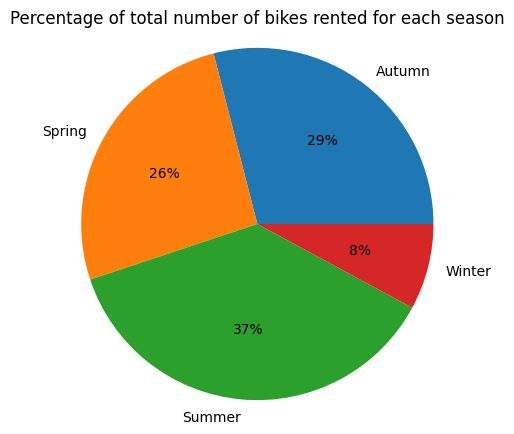

In [110]:
#Converting string to a list
seasons_list = list(seasons_col['Seasons'])
rented_count_list = list(seasons_col['Rented_Bike_Count'])
#Creating the pie chart visualisation for seasons column
plt.figure(figsize=(5,5))
plt.pie(rented_count_list,labels=seasons_list,autopct='%0.0f%%')
plt.title("Percentage of total number of bikes rented for each season")
plt.axis("equal")
plt.show()

      Holiday  Rented_Bike_Count
0     Holiday             215895
1  No Holiday            5956419


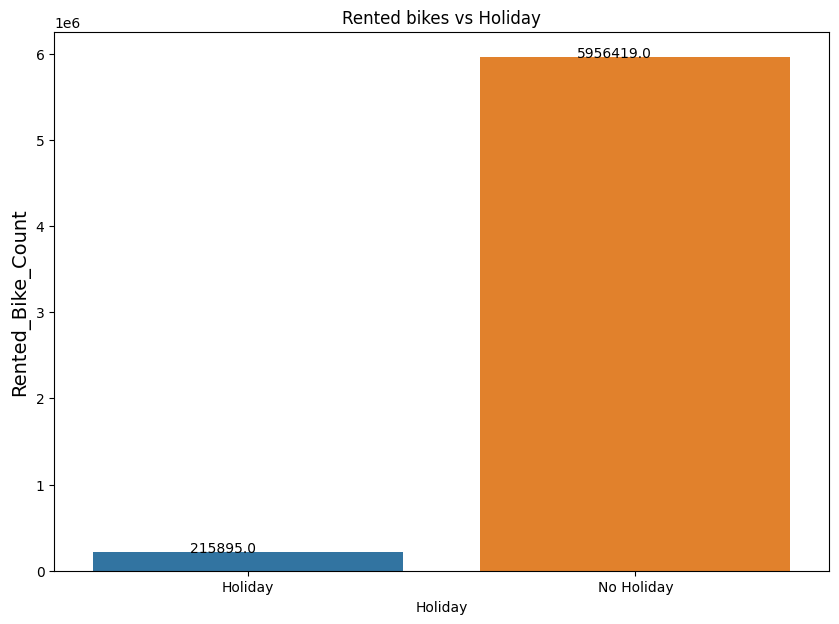

In [111]:
#Holiday column
holiday_col = rented_bike_analysis_df('Holiday')
print(holiday_col)
#Plotting the values
plt.figure(figsize=(10,7))
ax=sns.barplot(data=holiday_col,x='Holiday',y='Rented_Bike_Count')
plt.xlabel("Holiday")
plt.ylabel("Rented_Bike_Count", size=14)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.title("Rented bikes vs Holiday")
plt.show()

      Holiday  Rented_Bike_Count
0     Holiday             215895
1  No Holiday            5956419


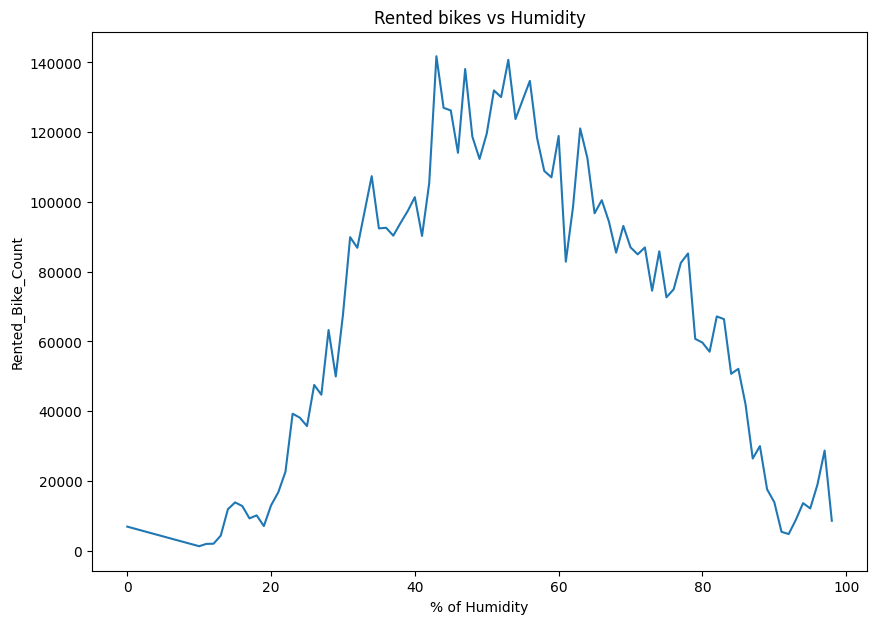

In [112]:
#Humidity column
humidity_col = rented_bike_analysis_df('Humidity')
print(holiday_col)
#Plotting the values
plt.figure(figsize=(10,7))
plt.plot(humidity_col['Humidity'],humidity_col['Rented_Bike_Count'])
plt.xlabel("% of Humidity")
plt.ylabel("Rented_Bike_Count")
plt.title("Rented bikes vs Humidity")
plt.show()

      Holiday  Rented_Bike_Count
0     Holiday             215895
1  No Holiday            5956419


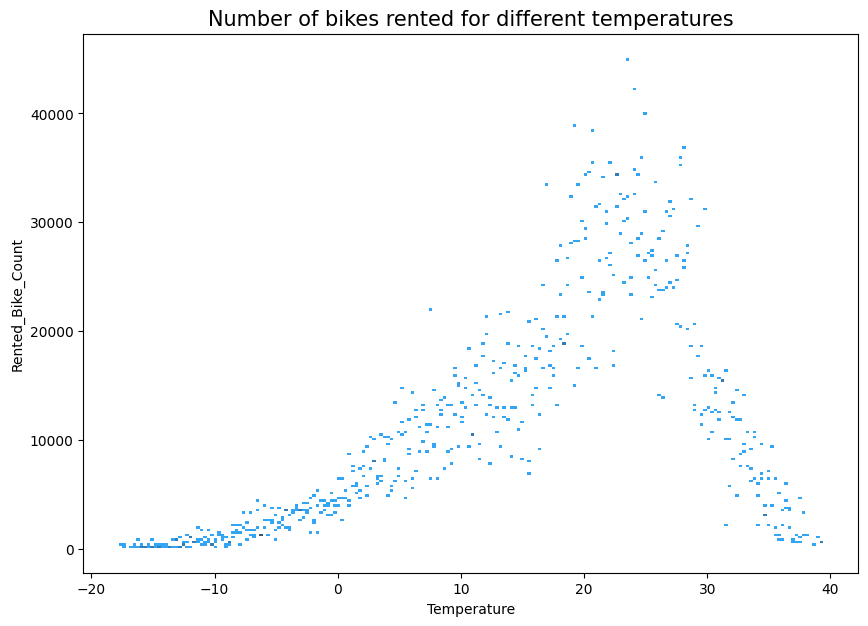

In [113]:
#Temperature vs rented bike count
temperature_col = rented_bike_analysis_df('Temperature')
print(holiday_col)
#Plotting the values
plt.figure(figsize=(10,7))
sns.histplot(data=temperature_col,x='Temperature',y='Rented_Bike_Count',bins=200)
plt.title('Number of bikes rented for different temperatures',size=15)
plt.show()

    Snowfall  Rented_Bike_Count
0        0.0            6090314
1        0.1                205
2        0.2               3643
3        0.3               8304
4        0.4               5981
5        0.5               4716
6        0.6               2775
7        0.7               5108
8        0.8               5632
9        0.9               4854
10       1.0               6357
11       1.1               1098
12       1.2                435
13       1.3               1092
14       1.4                429
15       1.5                168
16       1.6               3771
17       1.7                754
18       1.8               1551
19       1.9                703
20       2.0               4191
21       2.1                546
22       2.2               3813
23       2.3                897
24       2.4                792
25       2.5               1980
26       2.6               1303
27       2.7               1009
28       2.8                355
29       2.9                655
30      

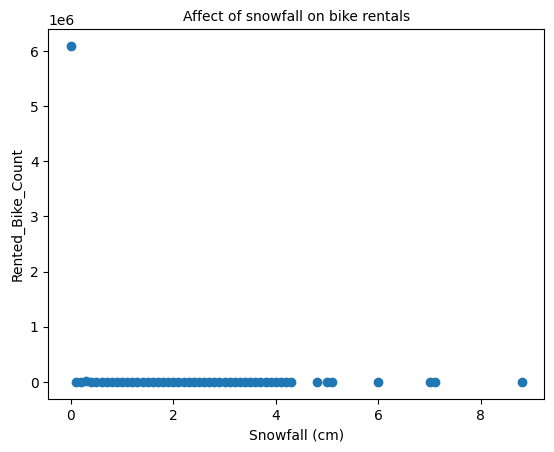

In [114]:
#Rented Bike vs Snowfall
snowfall_col = rented_bike_analysis_df('Snowfall')
print(snowfall_col)
#Plotting the values
plt.scatter(data=snowfall_col,x='Snowfall',y='Rented_Bike_Count')
plt.title('Affect of snowfall on bike rentals',size=10)
plt.xlabel('Snowfall (cm)')
plt.ylabel('Rented_Bike_Count')
plt.show()

    Rainfall  Rented_Bike_Count
0        0.0            6086009
1        0.1              15179
2        0.2               3706
3        0.3               1401
4        0.4               2147
..       ...                ...
56      21.0                 19
57      21.5                596
58      24.0                 61
59      29.5                122
60      35.0                151

[61 rows x 2 columns]


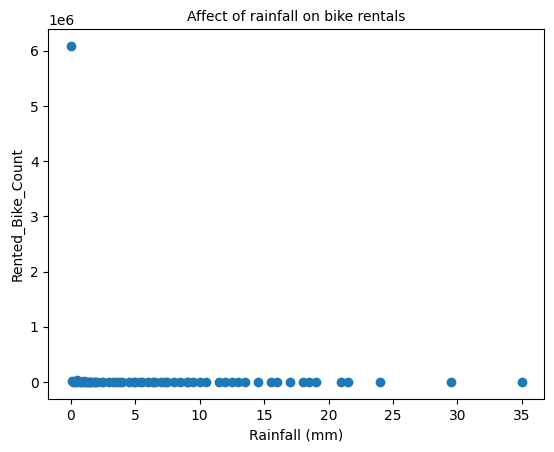

In [115]:
#Rented Bike vs Rainfall
rainfall_col = rented_bike_analysis_df('Rainfall')
print(rainfall_col)
#Plotting the values
plt.scatter(data=rainfall_col,x='Rainfall',y='Rented_Bike_Count')
plt.title('Affect of rainfall on bike rentals',size=10)
plt.xlabel('Rainfall (mm)')
plt.ylabel('Rented_Bike_Count')
plt.show()

      Visibility  Rented_Bike_Count
0             27                 83
1             33                 33
2             34                 24
3             38                 98
4             53                 65
...          ...                ...
1784        1996              19547
1785        1997              18324
1786        1998              19518
1787        1999              18466
1788        2000            1836690

[1789 rows x 2 columns]


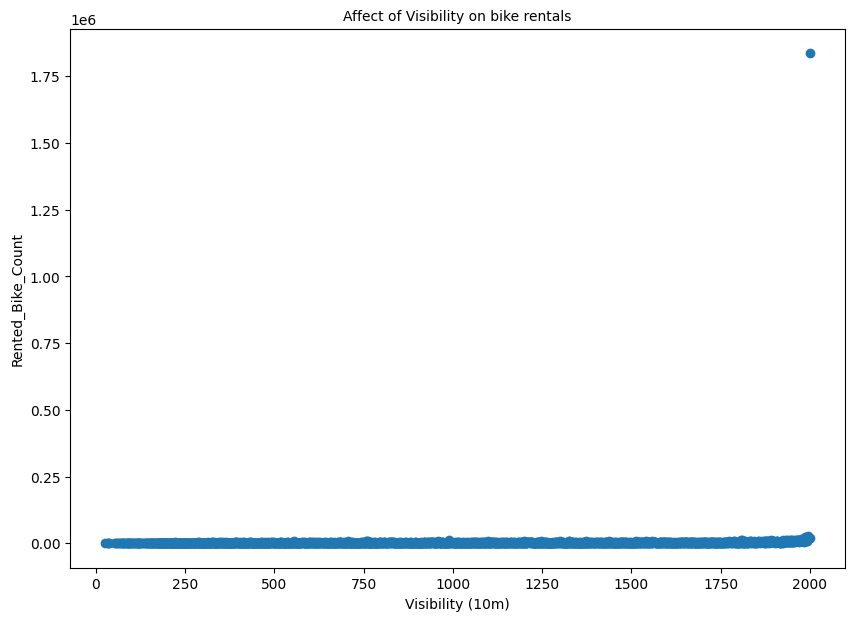

In [116]:
#Rented Bike vs Visibility
visibility_col = rented_bike_analysis_df('Visibility')
print(visibility_col)
#Plotting the values
plt.figure(figsize=(10,7))
plt.scatter(data=visibility_col,x='Visibility',y='Rented_Bike_Count')
plt.title('Affect of Visibility on bike rentals',size=10)
plt.xlabel('Visibility (10m)')
plt.ylabel('Rented_Bike_Count')
plt.show()

## **Multivariate Analysis**

[Text(0.5, 1.0, 'Hourly demand of Rented bikes according to weekdays and weekends')]

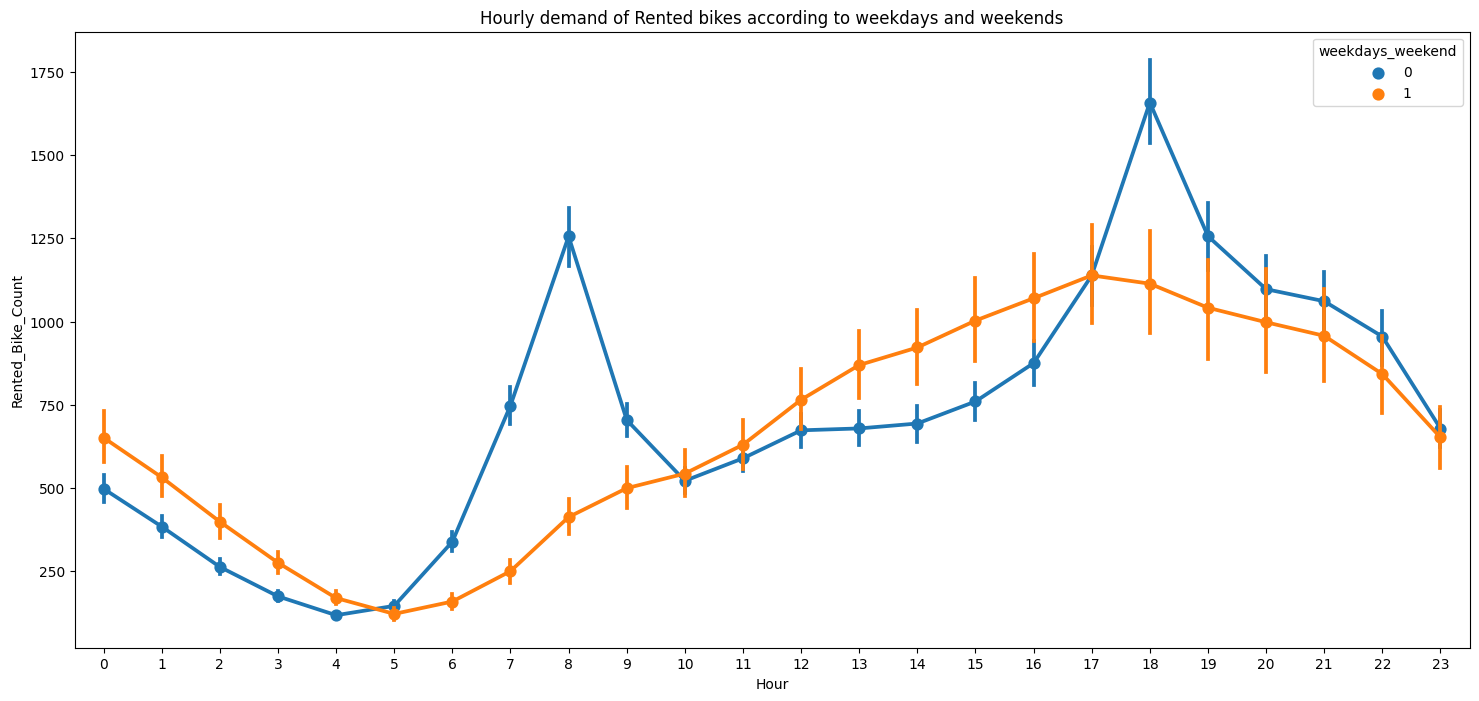

In [117]:
#hours vs Rented bike count according to weekdays and weekends
fig,ax=plt.subplots(figsize=(18,8))
sns.pointplot(data=bike_sharing_df,x='Hour',y='Rented_Bike_Count',hue='weekdays_weekend',ax=ax)
ax.set(title='Hourly demand of Rented bikes according to weekdays and weekends')

[Text(0.5, 1.0, 'Hourly demand of Rented bikes according to Functioning Day')]

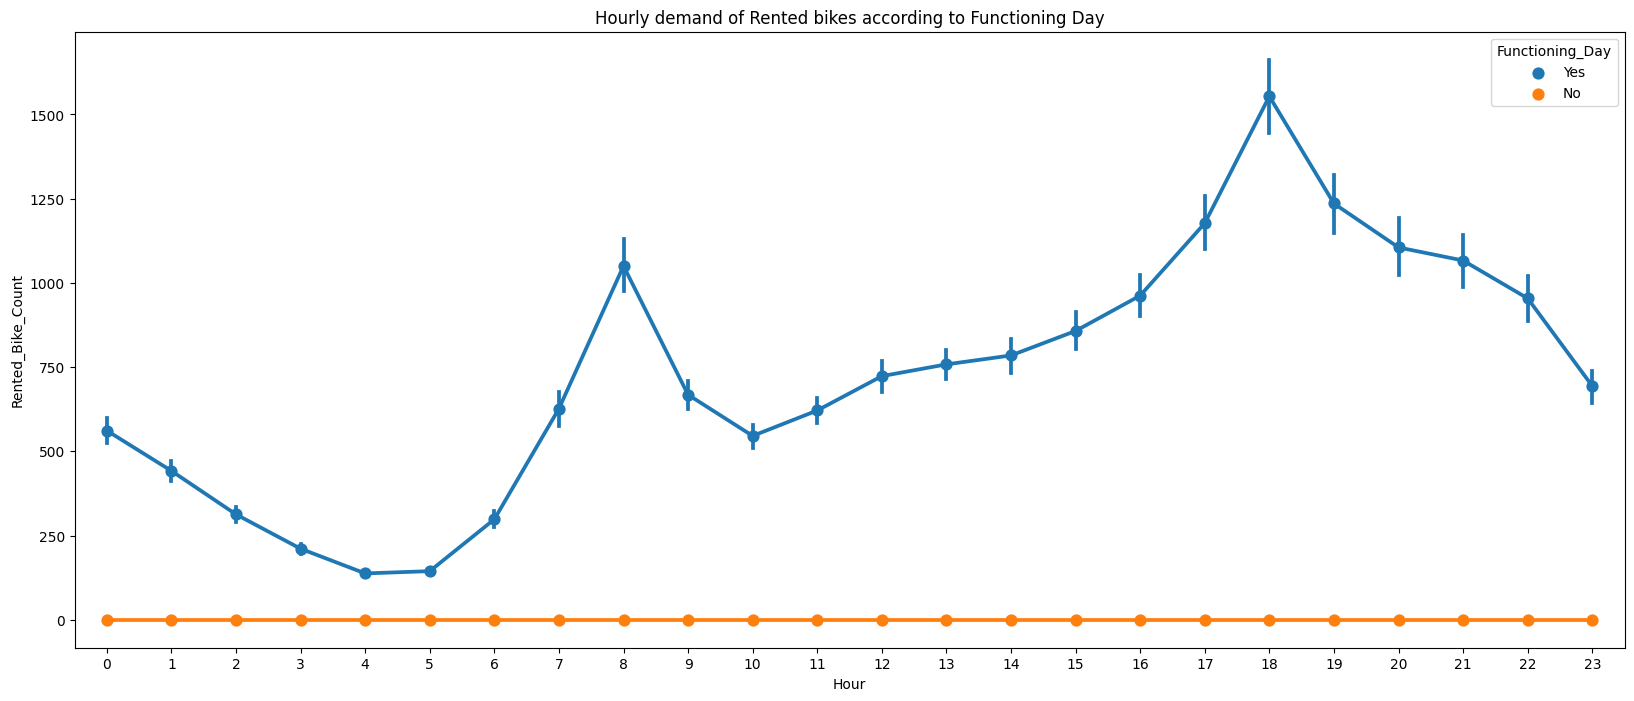

In [118]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_sharing_df,x='Hour',y='Rented_Bike_Count',hue='Functioning_Day',ax=ax)
ax.set(title='Hourly demand of Rented bikes according to Functioning Day')

[Text(0.5, 1.0, 'Hourly demand of Rented bikes according to seasons')]

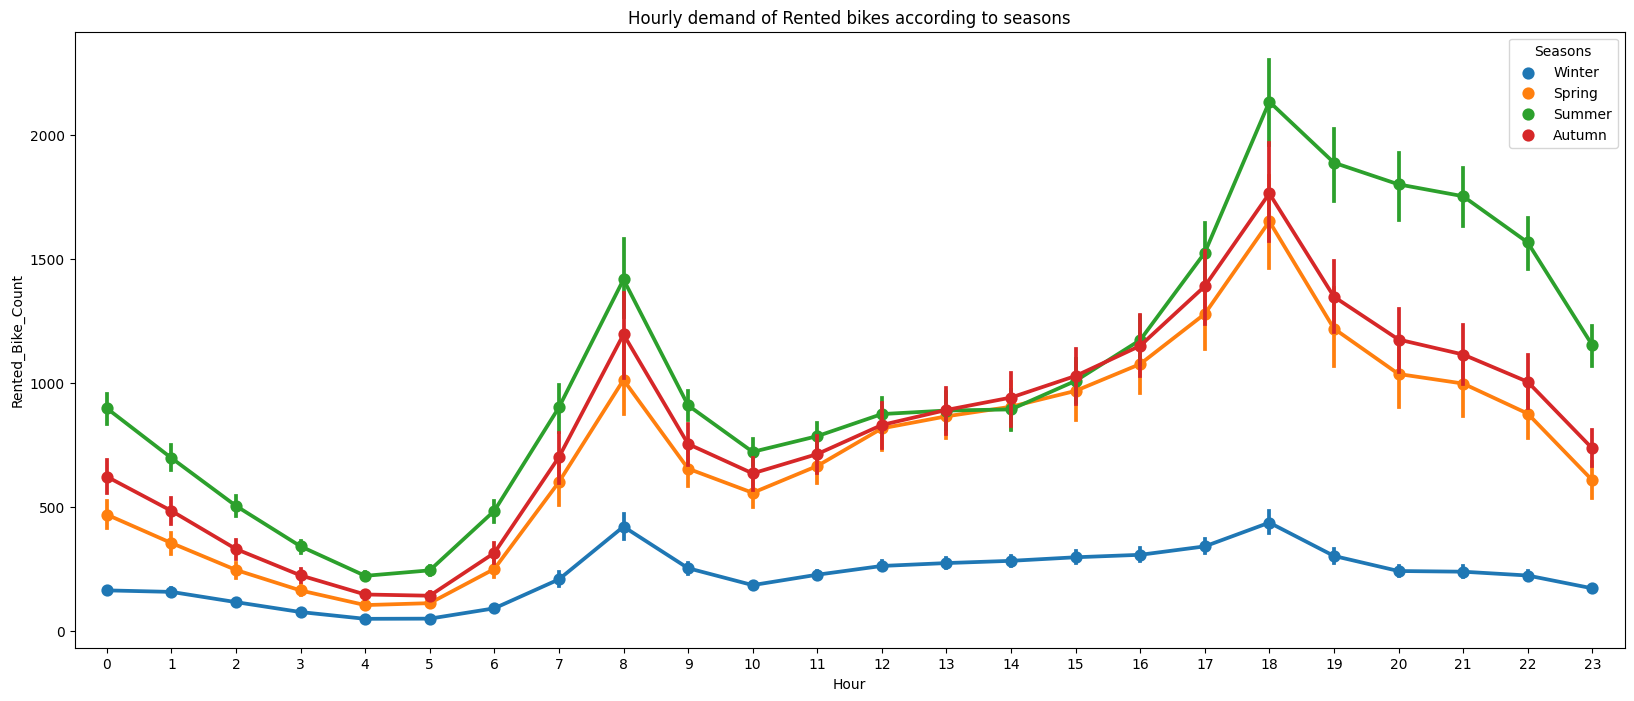

In [119]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=bike_sharing_df,x='Hour',y='Rented_Bike_Count',hue='Seasons',ax=ax)
ax.set(title='Hourly demand of Rented bikes according to seasons')

[Text(0.5, 1.0, 'Hourly demand of Rented bikes according to Holiday')]

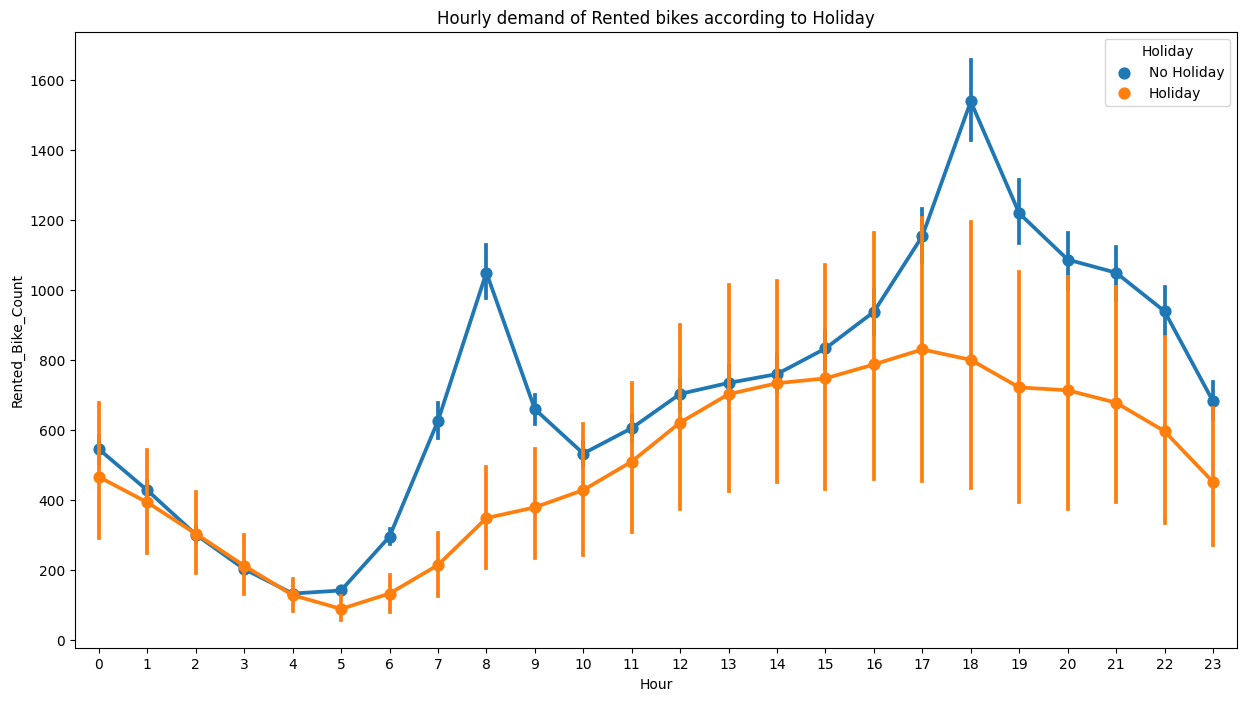

In [120]:
#Rented bikes vs Holiday
fig,ax=plt.subplots(figsize=(15,8))
sns.pointplot(data=bike_sharing_df,x='Hour',y='Rented_Bike_Count',hue='Holiday',ax=ax)
ax.set(title='Hourly demand of Rented bikes according to Holiday')

# **Feature Engineering**

## **Handling Multicollinearity**

In [121]:
#drop the Dew point temperature column
bike_sharing_df=bike_sharing_df.drop(['Dew_point_temperature'],axis=1)

In [122]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Rented_Bike_Count  8760 non-null   int64   
 1   Hour               8760 non-null   category
 2   Temperature        8760 non-null   float64 
 3   Humidity           8760 non-null   int64   
 4   Wind_speed         8760 non-null   float64 
 5   Visibility         8760 non-null   int64   
 6   Solar_Radiation    8760 non-null   float64 
 7   Rainfall           8760 non-null   float64 
 8   Snowfall           8760 non-null   float64 
 9   Seasons            8760 non-null   object  
 10  Holiday            8760 non-null   object  
 11  Functioning_Day    8760 non-null   object  
 12  month              8760 non-null   category
 13  weekdays_weekend   8760 non-null   category
dtypes: category(3), float64(5), int64(3), object(3)
memory usage: 779.8+ KB


In [123]:
#Updating the numerical variables column
numerical_variables.remove('Dew_point_temperature')
numerical_variables

['Rented_Bike_Count',
 'Temperature',
 'Humidity',
 'Wind_speed',
 'Visibility',
 'Solar_Radiation',
 'Rainfall',
 'Snowfall']

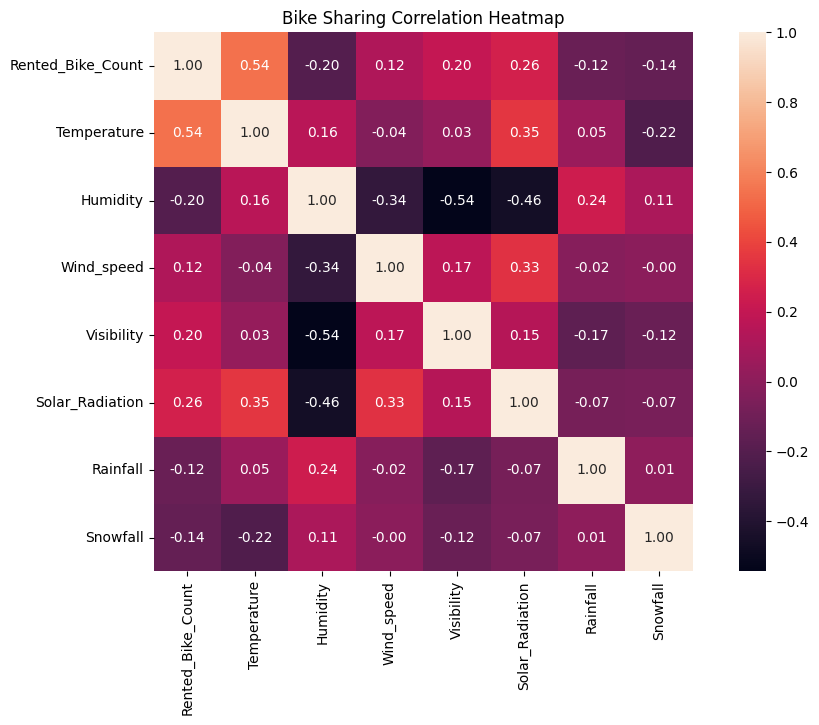

In [124]:
#correlation matrix of bike sharing after handling multicollinearity
corrmat = bike_sharing_df.corr()
f, ax = plt.subplots(figsize=(12, 7))
sns.heatmap(corrmat,annot = True,fmt='.2f', annot_kws={'size': 10},  vmax=1, square=True);
plt.title('Bike Sharing Correlation Heatmap')
plt.show()

## **Regression Plot**

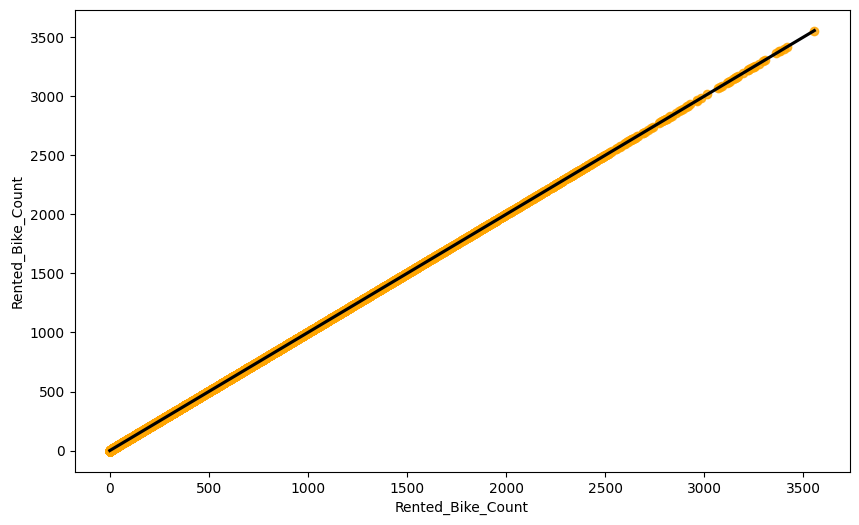

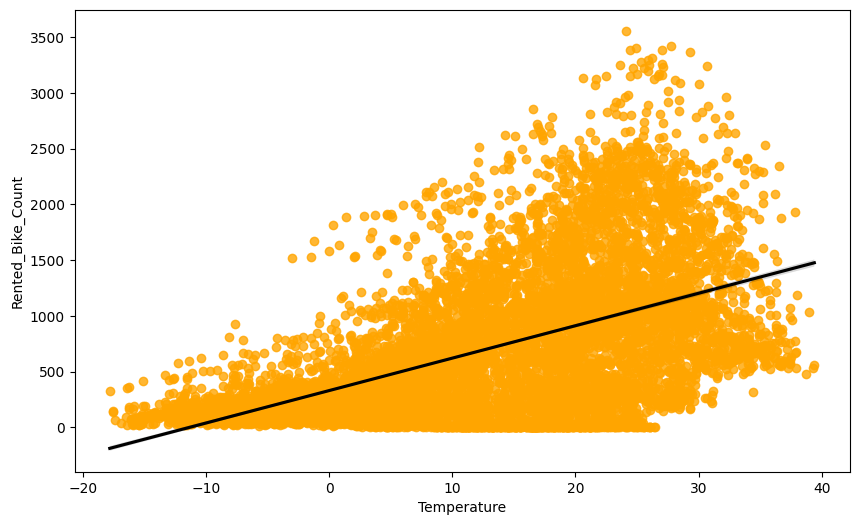

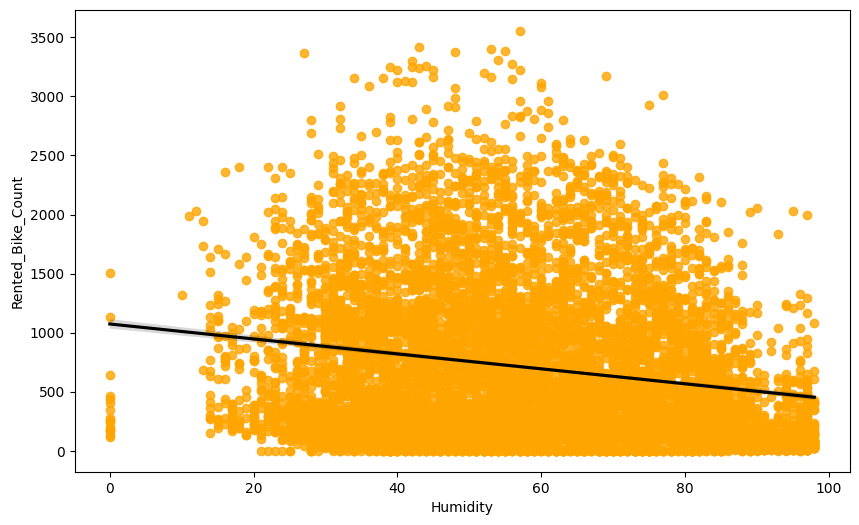

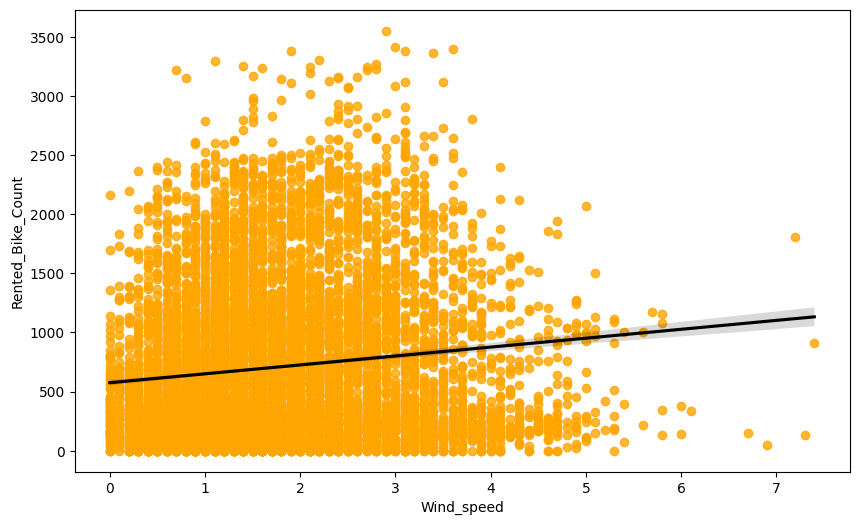

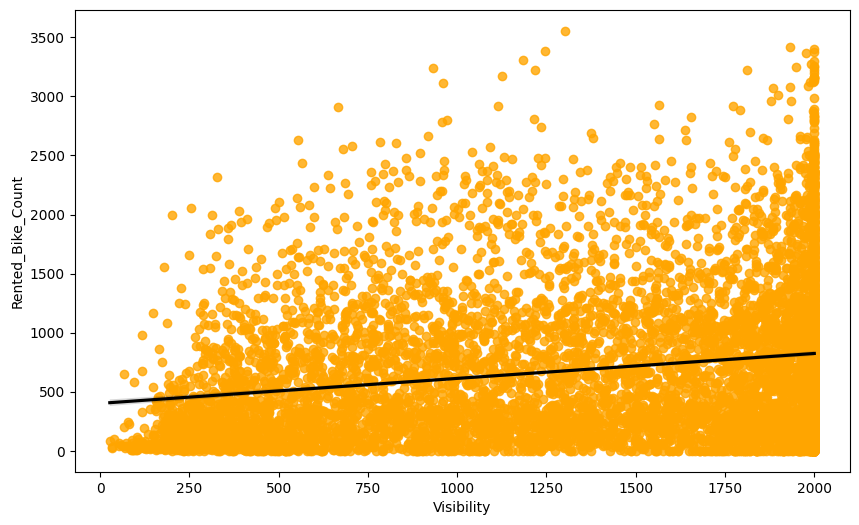

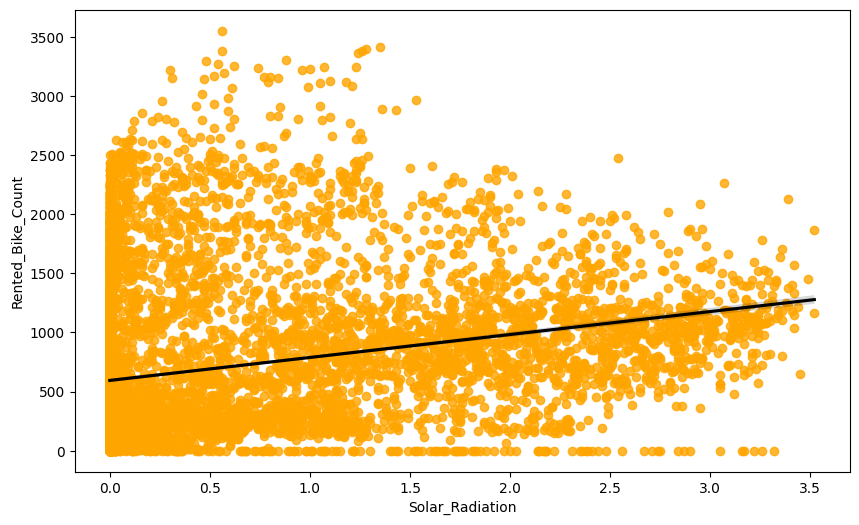

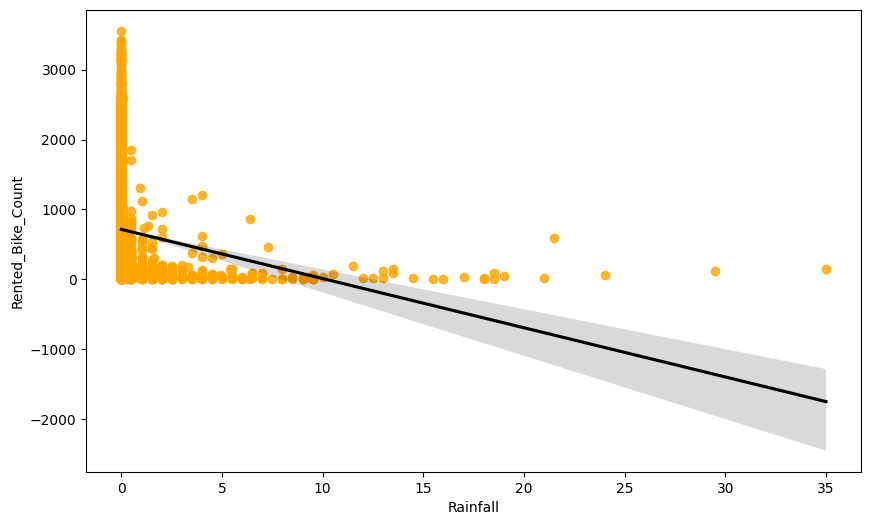

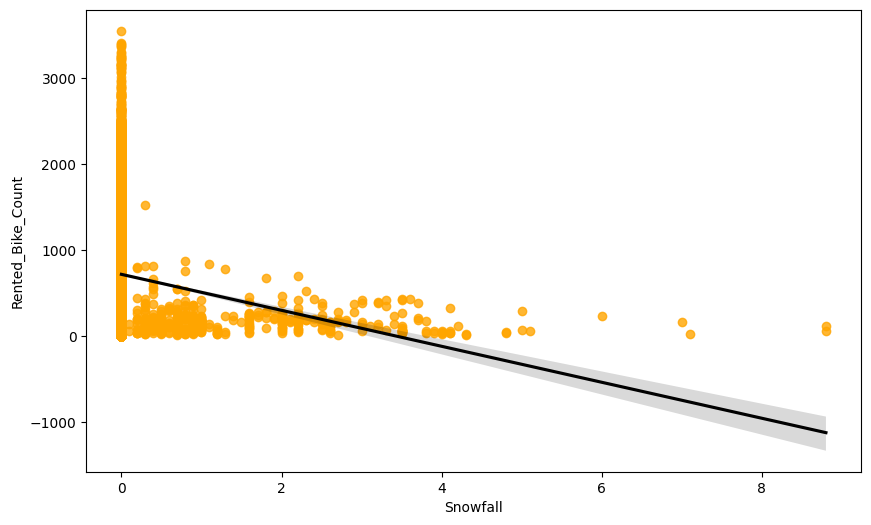

In [125]:
#printing the regression plot for all the numerical features
for col in numerical_variables:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=bike_sharing_df[col],y=bike_sharing_df['Rented_Bike_Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})
  plt.show()

# **Data Preprocessing**

### **Handling outliers**

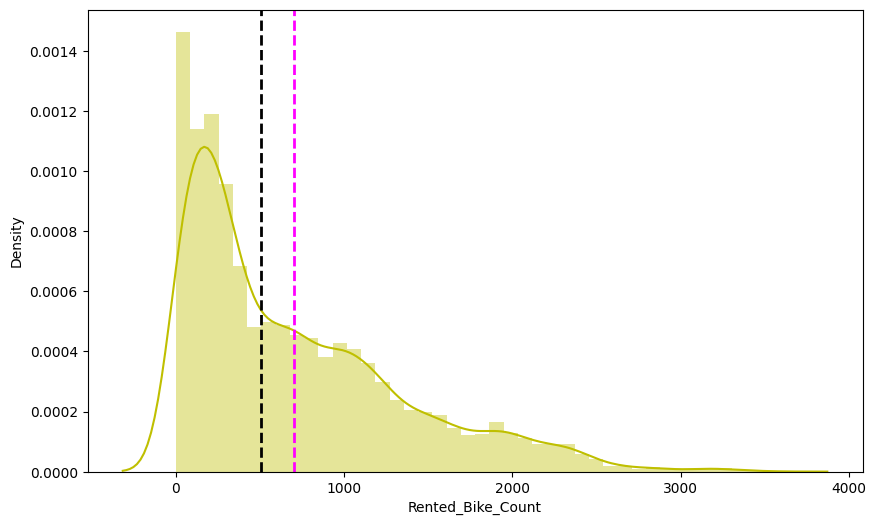

In [126]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rented_Bike_Count')
plt.ylabel('Density')

ax=sns.distplot(bike_sharing_df['Rented_Bike_Count'],hist=True ,color="y")
ax.axvline(bike_sharing_df['Rented_Bike_Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(bike_sharing_df['Rented_Bike_Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

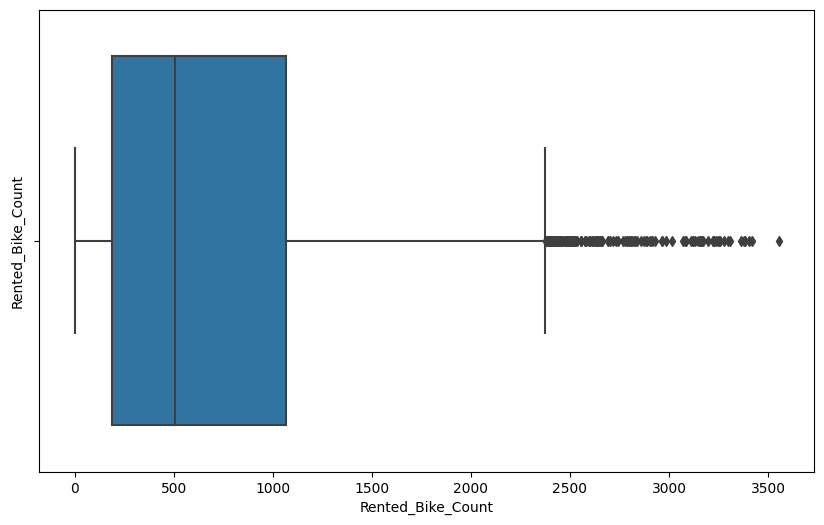

In [127]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=bike_sharing_df['Rented_Bike_Count'])
plt.show()

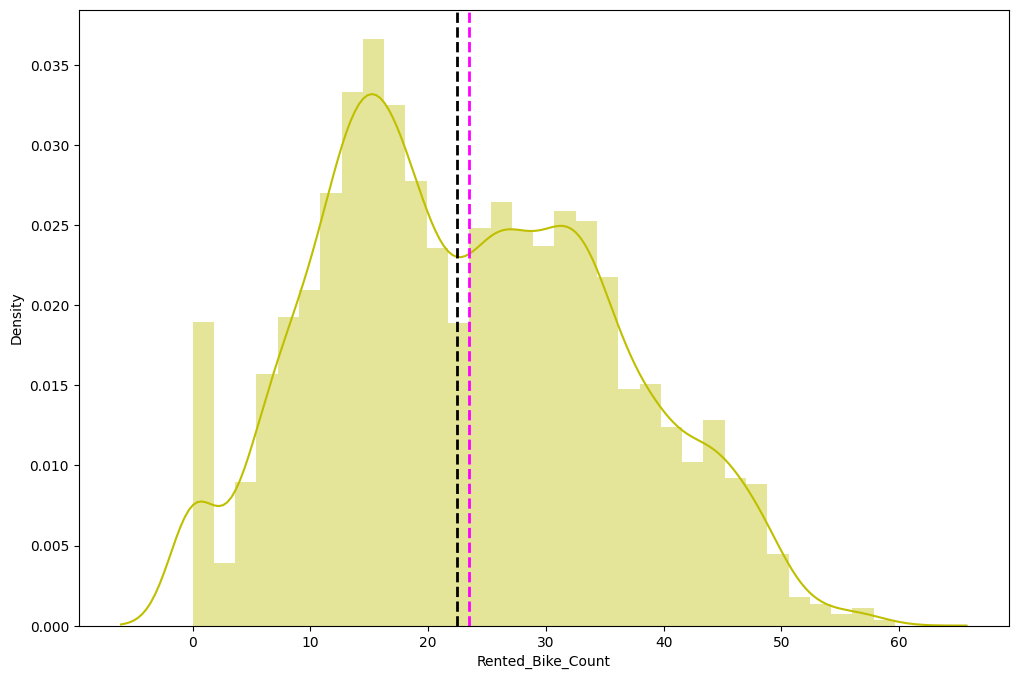

In [128]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(12,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(np.sqrt(bike_sharing_df['Rented_Bike_Count']), color="y")
ax.axvline(np.sqrt(bike_sharing_df['Rented_Bike_Count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(bike_sharing_df['Rented_Bike_Count']).median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

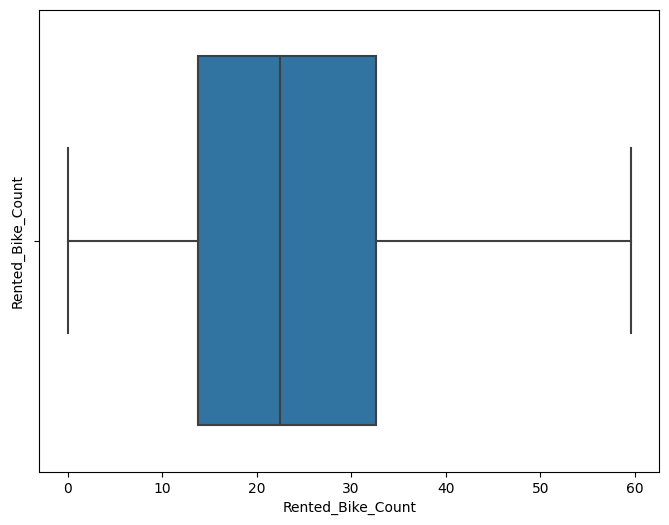

In [129]:
#After applying sqrt on Rented Bike Count check wheater we still have outliers
plt.figure(figsize=(8,6))
plt.ylabel('Rented_Bike_Count')
sns.boxplot(x=np.sqrt(bike_sharing_df['Rented_Bike_Count']))
plt.show()

## **Creating a copy Variables for model training and testing**

In [130]:
#Assign all catagoriacal columns to a variable
categorical_variables=list(bike_sharing_df.select_dtypes(['object','category']).columns)
categorical_variables=pd.Index(categorical_variables)
categorical_variables

Index(['Hour', 'Seasons', 'Holiday', 'Functioning_Day', 'month',
       'weekdays_weekend'],
      dtype='object')

In [131]:
#create a copy of dataframe
bike_sharing_df_copy = bike_sharing_df

def one_hot_encoding(data, column):
    data = pd.concat([data, pd.get_dummies(data[column], prefix=column, drop_first=True)], axis=1)
    data = data.drop([column], axis=1)
    return data

for col in categorical_variables:
    bike_sharing_df_copy = one_hot_encoding(bike_sharing_df_copy, col)
bike_sharing_df_copy.head()

Rented_Bike_Count  Temperature  Humidity  Wind_speed  Visibility  \
0                254         -5.2        37         2.2        2000   
1                204         -5.5        38         0.8        2000   
2                173         -6.0        39         1.0        2000   
3                107         -6.2        40         0.9        2000   
4                 78         -6.0        36         2.3        2000   

   Solar_Radiation  Rainfall  Snowfall  Hour_1  Hour_2  ...  month_4  month_5  \
0              0.0       0.0       0.0       0       0  ...        0        0   
1              0.0       0.0       0.0       1       0  ...        0        0   
2              0.0       0.0       0.0       0       1  ...        0        0   
3              0.0       0.0       0.0       0       0  ...        0        0   
4              0.0       0.0       0.0       0       0  ...        0        0   

   month_6  month_7  month_8  month_9  month_10  month_11  month_12  \
0        0        0        0        0         0         0         1   
1        0        0        0        0         0         0         1   
2        0        0        0        0         0         0         1   
3        0        0        0        0         0         0         1   
4        0        0        0        0         0         0         1   

   weekdays_weekend_1  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 48 columns]

## **Train Test split for regression**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.

In [132]:
#Assign the value in X and Y
X = bike_sharing_df_copy.drop(columns=['Rented_Bike_Count'], axis=1)
y = np.sqrt(bike_sharing_df_copy['Rented_Bike_Count'])

In [133]:
#First 5 rows of the X data that excludes column rented bike count from the main dataframe
X.head()

Temperature  Humidity  Wind_speed  Visibility  Solar_Radiation  Rainfall  \
0         -5.2        37         2.2        2000              0.0       0.0   
1         -5.5        38         0.8        2000              0.0       0.0   
2         -6.0        39         1.0        2000              0.0       0.0   
3         -6.2        40         0.9        2000              0.0       0.0   
4         -6.0        36         2.3        2000              0.0       0.0   

   Snowfall  Hour_1  Hour_2  Hour_3  ...  month_4  month_5  month_6  month_7  \
0       0.0       0       0       0  ...        0        0        0        0   
1       0.0       1       0       0  ...        0        0        0        0   
2       0.0       0       1       0  ...        0        0        0        0   
3       0.0       0       0       1  ...        0        0        0        0   
4       0.0       0       0       0  ...        0        0        0        0   

   month_8  month_9  month_10  month_11  month_12  weekdays_weekend_1  
0        0        0         0         0         1                   0  
1        0        0         0         0         1                   0  
2        0        0         0         0         1                   0  
3        0        0         0         0         1                   0  
4        0        0         0         0         1                   0  

[5 rows x 47 columns]

In [134]:
#First 5 rows of the Y data containing only rented bike data
y.head()

0    15.937377
1    14.282857
2    13.152946
3    10.344080
4     8.831761
Name: Rented_Bike_Count, dtype: float64

In [135]:
#Create test and train data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)

(6570, 47)
(2190, 47)


In [136]:
#Columns of the dummy dataframe
bike_sharing_df_copy.describe().columns

Index(['Rented_Bike_Count', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Solar_Radiation', 'Rainfall', 'Snowfall', 'Hour_1',
       'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8',
       'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14',
       'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20',
       'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_No Holiday', 'Functioning_Day_Yes',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12',
       'weekdays_weekend_1'],
      dtype='object')

# **Model Training**

## **Linear Regression**

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable being predicted is called the dependent variable and the variable being used to predict the other variable's value is called the independent variable.
In simple words its a best fit line drawn over the values of independent variables and dependent variable. In case of single variable, the formula is same as straight line equation having an intercept and slope.

**y_pred=β0+β1x**

where β0 and β1 are intercept and slope respectively.

In case of multiple features the formula translates into:

**y_pred=β0+β1x1+β2x2+β3x3+.....**

where x_1,x_2,x_3 are the features values and β0,β1,β2, and so on are weights assigned to each of the features. These become the parameters which the algorithm tries to learn using Gradient descent.

Gradient descent is the process by which the algorithm tries to update the parameters using a loss function . Loss function is nothing but the diffence between the actual values and predicted values(aka error or residuals). There are different types of loss function but this is the simplest one. Loss function summed over all observation gives the cost functions. The role of gradient descent is to update the parameters till the cost function is minimized i.e., a global minima is reached. It uses a hyperparameter 'alpha' that gives a weightage to the cost function and decides on how big the steps to take. Alpha is called as the learning rate. It is always necesarry to keep an optimal value of alpha as high and low values of alpha might make the gradient descent overshoot or get stuck at a local minima. There are also some basic assumptions that must be fulfilled before implementing this algorithm. They are:

- No multicollinearity in the dataset.

- Independent variables should show linear relationship with dv.

- Residual mean should be 0 or close to 0.

- There should be no heteroscedasticity i.e., variance should be constant along the line of best fit.

In [137]:
#Fitting the model
reg= LinearRegression().fit(X_train, y_train)

In [138]:
#checking the score
reg.score(X_train, y_train)

0.7722101548255267

In [139]:
#check the coefficeint
reg.coef_

array([ 5.11538263e-01, -1.27236196e-01, -2.90122073e-02,  9.90615715e-04,
        8.89701409e-01, -1.48171446e+00, -8.13629988e-02, -2.04211065e+00,
       -4.95822637e+00, -7.23630435e+00, -9.51882072e+00, -9.04457949e+00,
       -4.03213994e+00,  2.27462862e+00,  7.54438892e+00,  1.25491521e+00,
       -3.27047269e+00, -3.46014138e+00, -2.74135788e+00, -2.96341191e+00,
       -3.18317912e+00, -1.92136354e+00,  1.11918595e-01,  3.83216182e+00,
        1.02397844e+01,  6.78230326e+00,  6.08102846e+00,  6.20280481e+00,
        5.04597766e+00,  1.46736086e+00, -4.81648861e-01, -1.26348263e+00,
       -4.80391365e+00,  3.51130869e+00,  2.82758278e+01, -8.13449897e-01,
       -1.53946964e+00, -6.75094331e-01,  1.73291511e+00,  4.41327425e+00,
       -1.71047504e+00, -3.96628184e+00,  6.27209321e-01,  3.28833588e+00,
        2.63349995e+00,  2.07210333e+00, -1.42458875e+00])

In [140]:
# Predicting the X_train and X-test value
y_pred_train_linear=reg.predict(X_train)
y_pred_test_linear=reg.predict(X_test)

In [141]:
#Linear Regression for Train data
#Calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train_linear))
print("MSE :",MSE_lr)

#Calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#Calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train_linear)
print("MAE :",MAE_lr)

#Calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train_linear)
print("R2 :",r2_lr)
Adjusted_r2_lr = (1-(1-r2_score(y_train, y_pred_train_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_linear))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE : 35.07751288189293
RMSE : 5.9226271942350825
MAE : 4.474024092996784
R2 : 0.7722101548255267
Adjusted R2 : 0.7672119649454145


The r2 score value is 0.77 for Linear regression model and that means our model is  able to capture most of the data variance.

In [142]:
#storing the training set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_r2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [143]:
#Linear Regression for test data
#Calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test_linear)
print("MSE :",MSE_lr)

#Calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)

#Calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test_linear)
print("MAE :",MAE_lr)

#Calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test_linear))
print("R2 :",r2_lr)
Adjusted_r2_lr = (1-(1-r2_score((y_test), (y_pred_test_linear)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_r2_lr)

MSE : 33.27533089591926
RMSE : 5.76847734639907
MAE : 4.410178475318178
R2 : 0.7893518482962683
Adjusted R2 : 0.7847297833429184


The r2_score for the test set is 0.79. This means our linear model is  performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [144]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_r2_lr),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

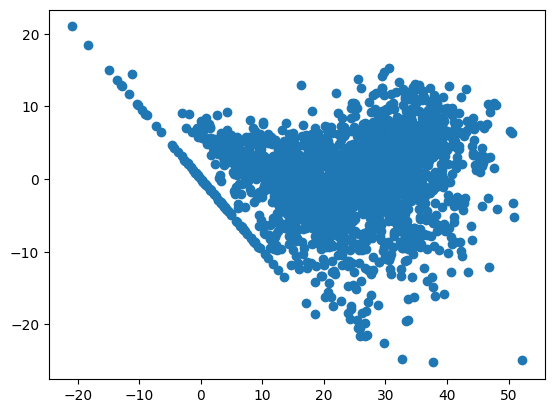

In [145]:
# Heteroscadacity
plt.scatter((y_pred_test_linear),(y_test)-(y_pred_test_linear))

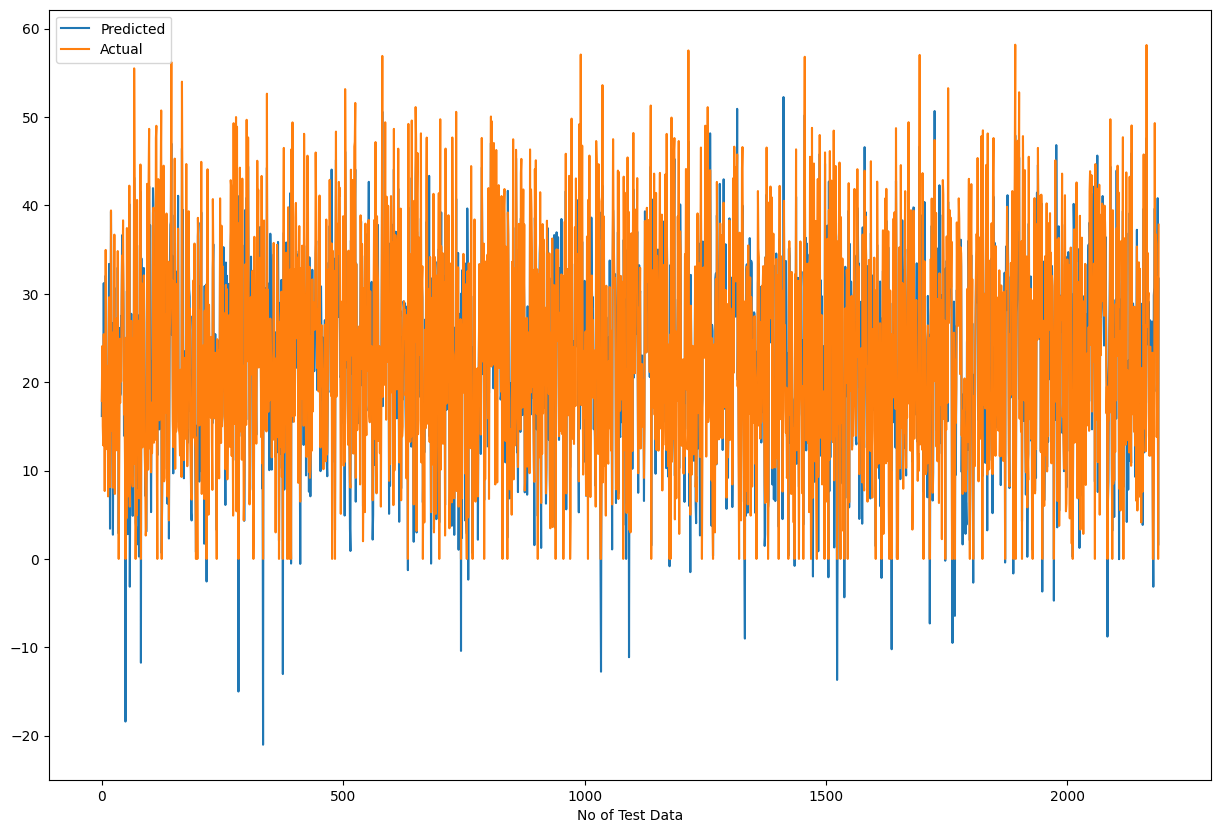

In [146]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test_linear)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

## **Lasso Regression**

Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [147]:
# Create an instance of Lasso Regression implementation
lasso = Lasso(alpha=1.0, max_iter=3000)

In [148]:
# Fitting the Lasso model
lasso.fit(X_train, y_train)

Lasso(max_iter=3000)

In [149]:
# Checking the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.3873692800799008 0.40519624904934015


In [150]:
# Predicting the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [151]:
#Lasso Regression for train data
#Calculate MSE
MSE_lasso= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_lasso)

#Calculate RMSE
RMSE_lasso=np.sqrt(MSE_lasso)
print("RMSE :",RMSE_lasso)

#Calculate MAE
MAE_lasso= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_lasso)

#Calculate r2 and adjusted r2
r2_lasso= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_lasso)
Adjusted_r2_lasso = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 91.59423336097032
RMSE : 9.570487623991283
MAE : 7.255041571454952
R2 : 0.40519624904934015
Adjusted R2 : 0.3921449996120475


The r2 score value is 0.41 for lasso regression model and that means our model is not able to capture most of the data variance.

In [152]:
# storing the training set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_lasso),3),
       'MSE':round((MSE_lasso),3),
       'RMSE':round((RMSE_lasso),3),
       'R2_score':round((r2_lasso),3),
       'Adjusted R2':round((Adjusted_r2_lasso ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [153]:
#Lasso Regression for test data
#Calculate MSE
MSE_lasso= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_lasso)

#Calculate RMSE
RMSE_lasso=np.sqrt(MSE_lasso)
print("RMSE :",RMSE_lasso)

#Calculate MAE
MAE_lasso= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_lasso)

#Calculate r2 and adjusted r2
r2_lasso= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_lasso)
Adjusted_r2_lasso=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 96.7750714044618
RMSE : 9.837432155011886
MAE : 7.455895061963607
R2 : 0.3873692800799008
Adjusted R2 : 0.37392686932535146


The r2_score for the test set is 0.39. This means our lasso regression model is  not performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [154]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_lasso),3),
       'MSE':round((MSE_lasso),3),
       'RMSE':round((RMSE_lasso),3),
       'R2_score':round((r2_lasso),3),
       'Adjusted R2':round((Adjusted_r2_lasso),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

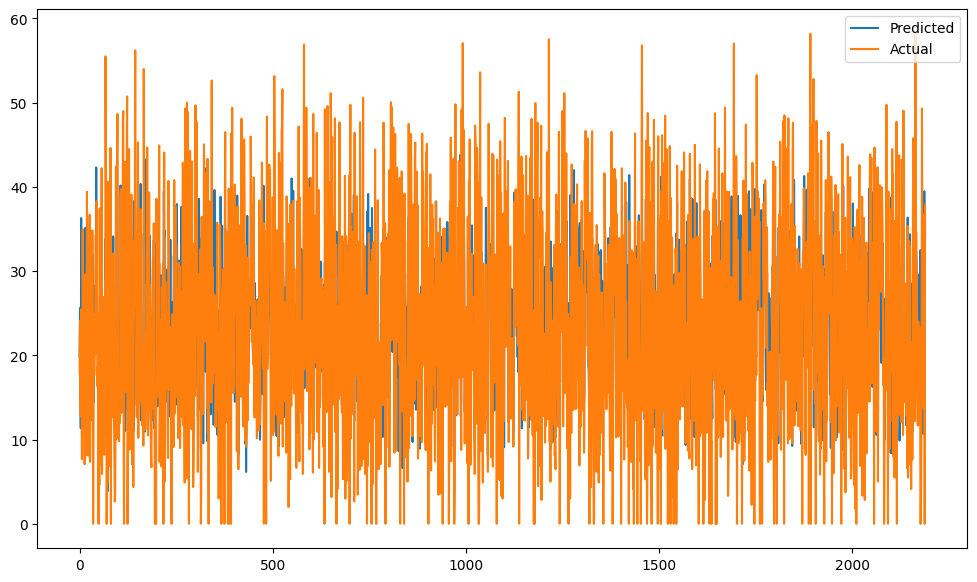

In [155]:
#Plot the figure
plt.figure(figsize=(12,7))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

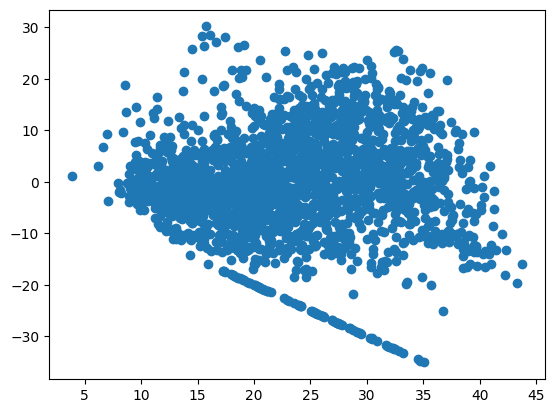

In [156]:
# Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))

## **Ridge Regression**

Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values being far away from the actual values.

In [157]:
# Create an instance of Ridge Regression implementation
ridge= Ridge(alpha=0.1)

In [158]:
# Fitting the model
ridge.fit(X_train, y_train)

Ridge(alpha=0.1)

In [159]:
#Checking the score
ridge.score(X_train, y_train)

0.7722100789802107

In [160]:
#Predicting the X_train and X_test values
y_pred_train_ridge = ridge.predict(X_train)
y_pred_test_ridge = ridge.predict(X_test)

In [161]:
#Ridge regression for train data
#Calculate MSE
MSE_ridge = mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :", MSE_ridge)

#Calculate RMSE
RMSE_ridge = np.sqrt(MSE_ridge)
print("RMSE :",RMSE_ridge)

#Calculate MAE
MAE_ridge = mean_absolute_error((y_train), (y_pred_train_ridge))
print("MAE :", MAE_ridge)

#Calculate r2 and adjusted r2
r2_ridge= r2_score((y_train), (y_pred_train_ridge))
print("R2 :", r2_ridge)
Adjusted_r2_ridge= (1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :", Adjusted_r2_ridge)

MSE : 35.07752456136463
RMSE : 5.922628180239296
MAE : 4.474125776125379
R2 : 0.7722100789802107
Adjusted R2 : 0.7672118874358922


The r2 score value is 0.77 for ridge regression model and that means our model is  able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [162]:
# storing the training set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_ridge),3),
       'MSE':round((MSE_ridge),3),
       'RMSE':round((RMSE_ridge),3),
       'R2_score':round((r2_ridge),3),
       'Adjusted R2':round((Adjusted_r2_ridge ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [163]:
#Ridge regression for test data
# calculate MSE
MSE_ridge = mean_squared_error((y_test), (y_pred_test_ridge))
print("MSE :", MSE_ridge)

#Calculate RMSE
RMSE_ridge = np.sqrt(MSE_ridge)
print("RMSE :",RMSE_ridge)

#Calculate MAE
MAE_ridge = mean_absolute_error((y_test), (y_pred_test_ridge))
print("MAE :", MAE_ridge)

#Calculate r2 and adjusted r2
r2_ridge= r2_score((y_test), (y_pred_test_ridge))
print("R2 :", r2_ridge)
Adjusted_r2_ridge= (1-(1-r2_score(y_test, y_pred_test_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :", Adjusted_r2_ridge)

MSE : 33.27678426818438
RMSE : 5.768603320404722
MAE : 4.410414932539515
R2 : 0.7893426477812578
Adjusted R2 : 0.7847203809491939


The r2_score for the test set is 0.79. This means our ridge regression model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [164]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Ridge regression ',
       'MAE':round((MAE_ridge),3),
       'MSE':round((MSE_ridge),3),
       'RMSE':round((RMSE_ridge),3),
       'R2_score':round((r2_ridge),3),
       'Adjusted R2':round((Adjusted_r2_ridge ),2)}
test_df=test_df.append(dict2,ignore_index=True)

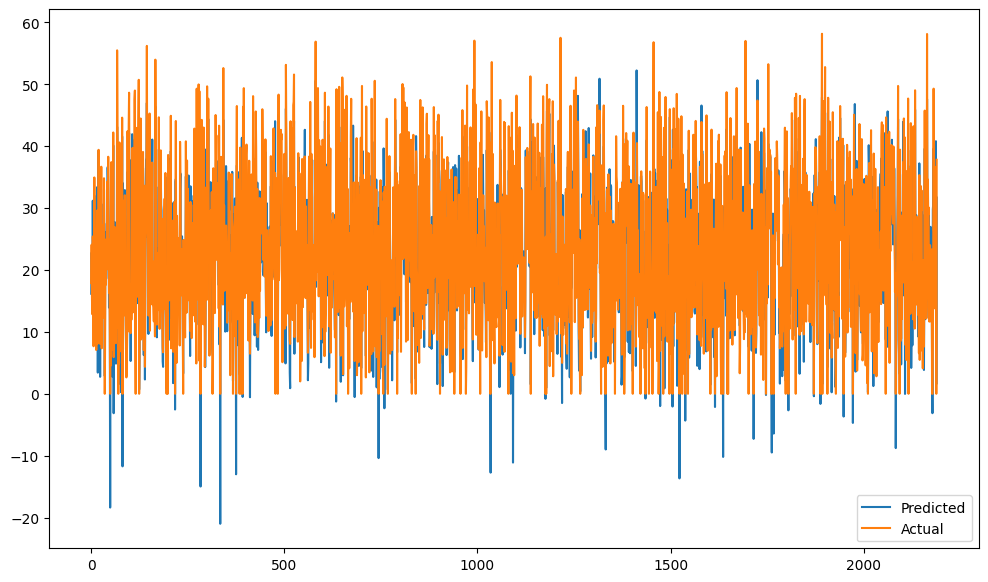

In [165]:
#Plot the figure
plt.figure(figsize=(12,7))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

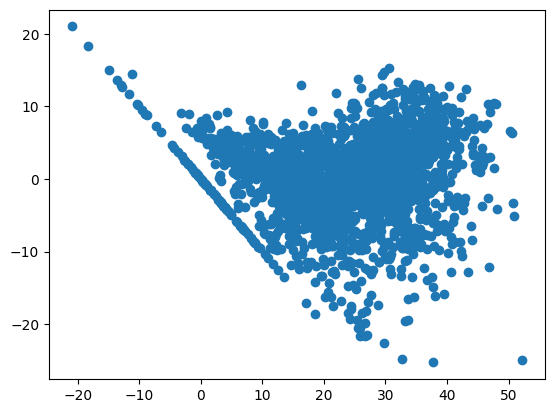

In [166]:
# Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

## **Elastic Net Regression**

Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. The technique combines both the lasso and ridge regression methods by learning from their shortcomings to improve the regularization of statistical models.

In [167]:
#import the packages
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [168]:
#Fitting the model
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [169]:
#check the score
elasticnet.score(X_train, y_train)

0.6261189054494012

In [170]:
# Predicting the X_train and X-test value
y_pred_train_enr=elasticnet.predict(X_train)
y_pred_test_enr=elasticnet.predict(X_test)

In [171]:
#Elastic Net Regression for train data
#Calculate MSE
MSE_enr= mean_squared_error((y_train), (y_pred_train_enr))
print("MSE :",MSE_enr)

#Calculate RMSE
RMSE_enr=np.sqrt(MSE_enr)
print("RMSE :", RMSE_enr)

#Calculate MAE
MAE_enr= mean_absolute_error(y_train, y_pred_train_enr)
print("MAE :", MAE_enr)

#Calculate r2 and adjusted r2
r2_enr= r2_score(y_train, y_pred_train_enr)
print("R2 :", r2_enr)
Adjusted_r2_enr=(1-(1-r2_score(y_train, y_pred_train_enr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_enr))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 57.5742035398887
RMSE : 7.587766703048315
MAE : 5.792276538970546
R2 : 0.6261189054494012
Adjusted R2 : 0.6179151652795234


The r2 score value is 0.63 using elastic net regression and that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [172]:
# storing the training set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_enr),3),
       'MSE':round((MSE_enr),3),
       'RMSE':round((RMSE_enr),3),
       'R2_score':round((r2_enr),3),
       'Adjusted R2':round((Adjusted_r2_enr),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [173]:
#Elastic Net Regression for test data
#Calculate MSE
MSE_enr= mean_squared_error(y_test, y_pred_test_enr)
print("MSE :",MSE_enr)

#Calculate RMSE
RMSE_enr=np.sqrt(MSE_enr)
print("RMSE :",RMSE_enr)

#Calculate MAE
MAE_enr= mean_absolute_error(y_test, y_pred_test_enr)
print("MAE :",MAE_enr)

#Calculate r2 and adjusted r2
r2_enr= r2_score((y_test), (y_pred_test_enr))
print("R2 :",r2_enr)
Adjusted_r2_e=(1-(1-r2_score((y_test), (y_pred_test_enr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_enr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 59.45120536350042
RMSE : 7.710460775044538
MAE : 5.873612334800099
R2 : 0.6236465216363589
Adjusted R2 : 0.6153885321484546


The r2_score for the test set is 0.62. This means our elastic net regression model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [174]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression ',
       'MAE':round((MAE_enr),3),
       'MSE':round((MSE_enr),3),
       'RMSE':round((RMSE_enr),3),
       'R2_score':round((r2_enr),3),
       'Adjusted R2':round((Adjusted_r2_enr),2)}
test_df=test_df.append(dict2,ignore_index=True)

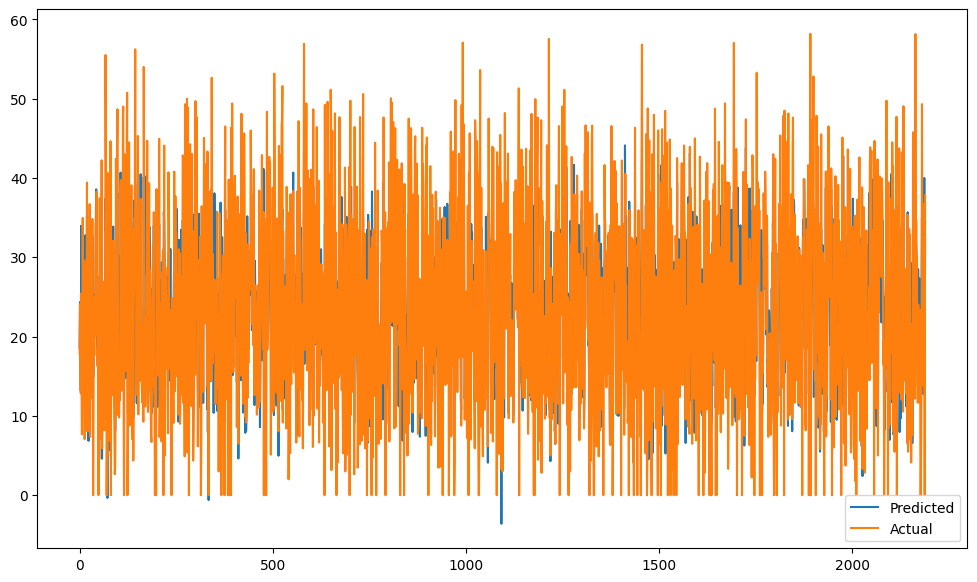

In [175]:
#Plot the figure
plt.figure(figsize=(12,7))
plt.plot(np.array(y_pred_test_enr))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

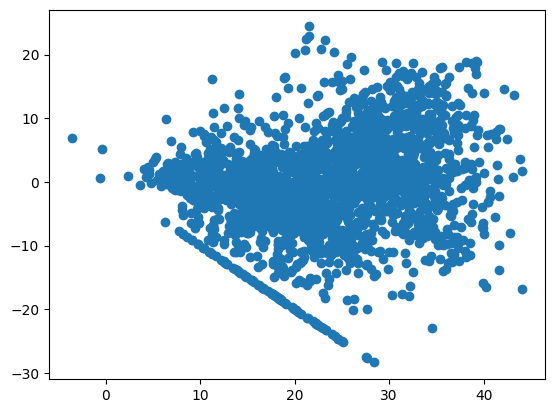

In [176]:
# Heteroscadacity
plt.scatter((y_pred_test_enr),(y_test)-(y_pred_test_enr))

## **Decision Tree**

A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes).

In [177]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='squared_error', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)

In [178]:
#fitting the model
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, max_features=9, max_leaf_nodes=100)

In [179]:
# Predicting the X_train and X-test value
y_pred_train_dt = decision_regressor.predict(X_train)
y_pred_test_dt = decision_regressor.predict(X_test)

In [180]:
#Checking the model score
print("Model Score:",decision_regressor.score(X_train,y_train))

Model Score: 0.5042002639235827


In [181]:
#for train data
#Calculate MSE
MSE_dt= mean_squared_error(y_train, y_pred_train_dt)
print("MSE :",MSE_dt)

#Calculate RMSE
RMSE_dt=np.sqrt(MSE_dt)
print("RMSE :",RMSE_dt)

#Calculate MAE
MAE_dt= mean_absolute_error(y_train, y_pred_train_dt)
print("MAE :",MAE_dt)

#Calculate r2 and adjusted r2
r2_dt= r2_score(y_train, y_pred_train_dt)
print("R2 :",r2_dt)
Adjusted_r2_dt=(1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


MSE : 76.34853790667823
RMSE : 8.737765040711396
MAE : 6.137683627010358
R2 : 0.5042002639235827
Adjusted R2 : 0.49332137148866606


The r2 score value is 0.50 using decision tree model and that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [182]:
# storing the training set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_dt),3),
       'MSE':round((MSE_dt),3),
       'RMSE':round((RMSE_dt),3),
       'R2_score':round((r2_dt),3),
       'Adjusted R2':round((Adjusted_r2_dt),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [183]:
#For test data
#Calculate MSE
MSE_dt= mean_squared_error(y_test, y_pred_test_dt)
print("MSE :",MSE_dt)

#Calculate RMSE
RMSE_dt=np.sqrt(MSE_dt)
print("RMSE :",RMSE_dt)

#Calculate MAE
MAE_dt= mean_absolute_error(y_test, y_pred_test_dt)
print("MAE :",MAE_dt)

#Calculate r2 and adjusted r2
r2_dt= r2_score(y_test, y_pred_test_dt)
print("R2 :",r2_dt)
Adjusted_r2_dt=(1-(1-r2_score(y_test, y_pred_test_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_dt))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))


MSE : 90.18554017920914
RMSE : 9.496606771853257
MAE : 6.693548683309345
R2 : 0.4290840440152378
Adjusted R2 : 0.4165569432069821


The r2_score for the test set is 0.66. This means our decision tree model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [184]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_dt),3),
       'MSE':round((MSE_dt),3),
       'RMSE':round((RMSE_dt),3),
       'R2_score':round((r2_dt),3),
       'Adjusted R2':round((Adjusted_r2_dt),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

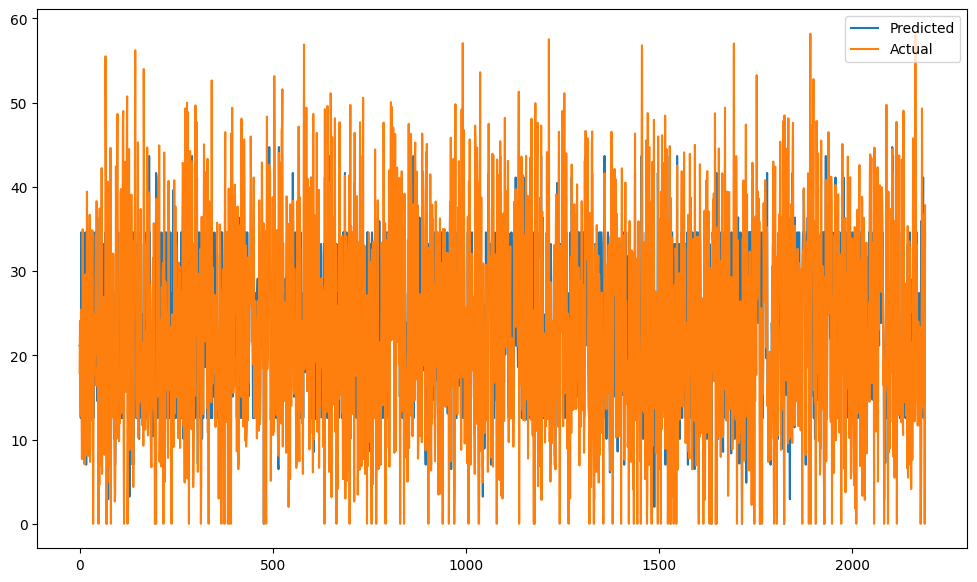

In [185]:
#Plot the figure
plt.figure(figsize=(12,7))
plt.plot((np.array(y_pred_test_dt)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

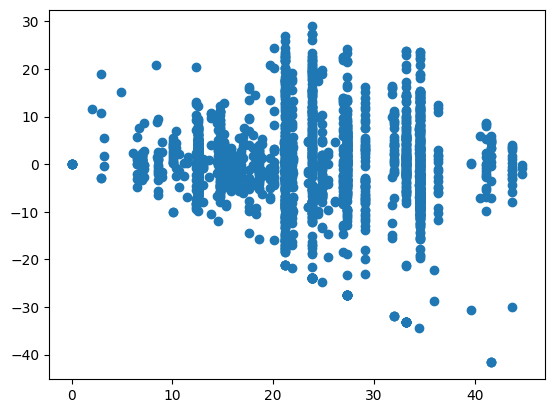

In [186]:
# Heteroscadacity
plt.scatter((y_pred_test_dt),(y_test)-(y_pred_test_dt))

## **Random Forest**

Random forest is a commonly-used machine learning algorithm which combines the output of multiple decision trees to reach a single result. Its ease of use and flexibility have fueled its adoption, as it handles both classification and regression problems.

In [187]:
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [188]:
# Making predictions on train and test data
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

In [189]:
#Checking model score
print("Model Score:",rf_model.score(X_train,y_train))

Model Score: 0.9897698385440608


In [190]:
#For train data
#Calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_rf)
print("MSE :",MSE_rf)

#Calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

#Calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_rf)
print("MAE :",MAE_rf)

#Calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_rf)
print("R2 :",r2_rf)
Adjusted_r2_rf=(1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 1.5753495068215058
RMSE : 1.2551292789276751
MAE : 0.8027266707199874
R2 : 0.9897698385440608
Adjusted R2 : 0.9895453672142619


The r2 score value is 0.99 using random forest model and that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [191]:
# storing the training set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_r2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [192]:
#For test data
#Calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_rf)
print("MSE :",MSE_rf)

#Calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)

#Calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_rf)
print("MAE :",MAE_rf)

#Calculate r2 and adjusted r2
r2_rf= r2_score(y_test, y_pred_test_rf)
print("R2 :",r2_rf)
Adjusted_r2_rf=(1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_test, y_pred_test_rf))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.535223174637169
RMSE : 3.540511710845929
MAE : 2.200784209567128
R2 : 0.9206462709209324
Adjusted R2 : 0.9189050826544917


The r2_score for the test set is 0.92. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [193]:
# storing the training set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_r2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

In [194]:
#Plot the figure
plt.figure(figsize=(12,7))
plt.plot((np.array(y_pred_test_rf)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

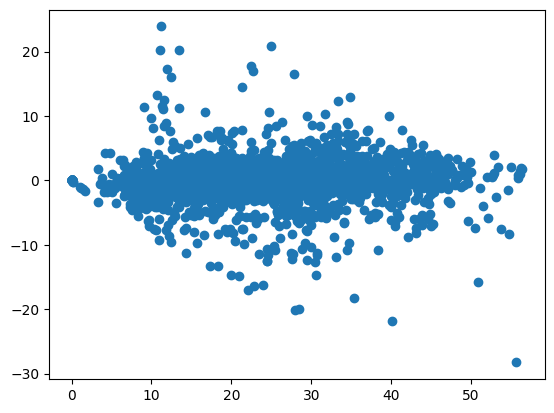

In [195]:
# Heteroscadacity
plt.scatter((y_pred_test_rf),(y_test)-(y_pred_test_rf))

### **Feature Importance**

In [196]:
rf_model.feature_importances_

array([3.13063644e-01, 1.57679250e-01, 1.22600665e-02, 1.20558513e-02,
       3.23944409e-02, 3.34322535e-02, 1.52222081e-03, 4.46647158e-03,
       1.32606643e-02, 2.02087851e-02, 2.91345629e-02, 2.49563106e-02,
       8.23193041e-03, 4.21133446e-03, 1.41727332e-02, 1.06881592e-03,
       2.35014776e-03, 1.14339863e-03, 2.97904543e-04, 2.93643237e-04,
       3.79651092e-04, 1.50654576e-03, 3.70715716e-03, 1.05906863e-02,
       3.13078778e-02, 1.69316705e-02, 1.21897620e-02, 1.30617869e-02,
       9.83551476e-03, 4.04559598e-03, 4.24638987e-03, 1.02289193e-03,
       9.67023631e-03, 3.86972430e-03, 1.50261120e-01, 2.73014931e-04,
       4.11495662e-03, 1.24491476e-03, 1.44759316e-03, 2.45714478e-03,
       7.20770195e-04, 2.18104430e-03, 9.57648642e-04, 2.51592898e-03,
       5.10314919e-03, 7.43269693e-04, 1.94095252e-02])

In [197]:
importances = rf_model.feature_importances_
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)
print (importance_df)

                Feature  Feature Importance
0           Temperature            0.313064
1              Humidity            0.157679
2            Wind_speed            0.012260
3            Visibility            0.012056
4       Solar_Radiation            0.032394
5              Rainfall            0.033432
6              Snowfall            0.001522
7                Hour_1            0.004466
8                Hour_2            0.013261
9                Hour_3            0.020209
10               Hour_4            0.029135
11               Hour_5            0.024956
12               Hour_6            0.008232
13               Hour_7            0.004211
14               Hour_8            0.014173
15               Hour_9            0.001069
16              Hour_10            0.002350
17              Hour_11            0.001143
18              Hour_12            0.000298
19              Hour_13            0.000294
20              Hour_14            0.000380
21              Hour_15         

In [198]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [199]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0           Temperature                0.31
1              Humidity                0.16
34  Functioning_Day_Yes                0.15
10               Hour_4                0.03
4       Solar_Radiation                0.03
5              Rainfall                0.03
24              Hour_18                0.03
25              Hour_19                0.02
11               Hour_5                0.02
46   weekdays_weekend_1                0.02
9                Hour_3                0.02
3            Visibility                0.01
44             month_11                0.01
2            Wind_speed                0.01
32       Seasons_Winter                0.01
8                Hour_2                0.01
27              Hour_21                0.01
26              Hour_20                0.01
28              Hour_22                0.01
23              Hour_17                0.01
12               Hour_6                0.01
14               Hour_8                0.01
13               Hour_7                0.00
45             month_12                0.00
43             month_10                0.00
42              month_9                0.00
41              month_8                0.00
40              month_7                0.00
39              month_6                0.00
38              month_5                0.00
37              month_4                0.00
36              month_3                0.00
35              month_2                0.00
19              Hour_13                0.00
20              Hour_14                0.00
31       Seasons_Summer                0.00
30       Seasons_Spring                0.00
29              Hour_23                0.00
15               Hour_9                0.00
16              Hour_10                0.00
17              Hour_11                0.00
18              Hour_12                0.00
6              Snowfall                0.00
7                Hour_1                0.00
22              Hour_16                0.00
21              Hour_15                0.00
33   Holiday_No Holiday                0.00

In [200]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

In [201]:
#Plot the figure
plt.figure(figsize=(10,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

## **Gradient Boosting**

Gradient boosting is a machine learning technique used in regression and classification tasks, among others. It gives a prediction model in the form of an ensemble of weak prediction models, which are typically decision trees.

In [202]:
#Create an instance of the Gradient Boosting Regressor
gb_model = GradientBoostingRegressor()
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [203]:
#Making predictions on train and test data
y_pred_train_gb = gb_model.predict(X_train)
y_pred_test_gb = gb_model.predict(X_test)

In [204]:
#Checking model score
print("Model Score:",gb_model.score(X_train,y_train))

Model Score: 0.8789016499095264


In [205]:
#For train data
#Calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_gb)
print("MSE :",MSE_gb)

#Calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)

#Calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_gb)
print("MAE :",MAE_gb)

#Calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_gb)
print("R2 :",r2_gb)
Adjusted_r2_gb = (1-(1-r2_score(y_train, y_pred_train_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_gb))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 18.64801713184794
RMSE : 4.3183349953249275
MAE : 3.2690035692731247
R2 : 0.8789016499095264
Adjusted R2 : 0.8762444965695393


The r2 score value is 0.88 using gradient boosting model and that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [206]:
# storing the training set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_r2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [207]:
#For test data
#Calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_gb)
print("MSE :",MSE_gb)

#Calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)

#Calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_gb)
print("MAE :",MAE_gb)

#Calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_gb))
print("R2 :",r2_gb)
Adjusted_r2_gb = (1-(1-r2_score((y_test), (y_pred_test_gb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_gb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 21.28944184250869
RMSE : 4.6140483138463875
MAE : 3.4928587865599914
R2 : 0.8652280396863458
Adjusted R2 : 0.8622708584843188


The r2_score for the test set is 0.86. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [208]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_r2_gb),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

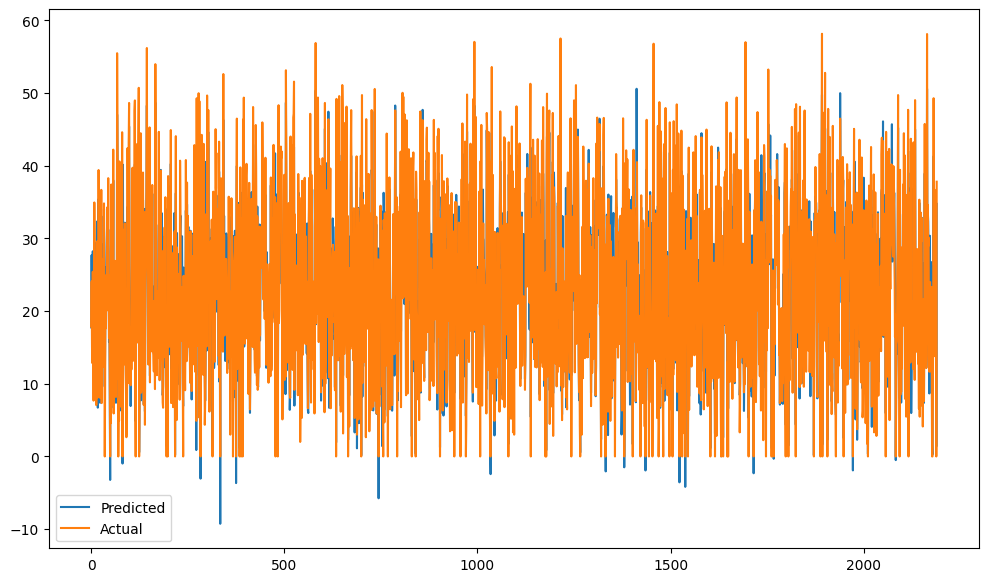

In [209]:
#Plot the figure
plt.figure(figsize=(12,7))
plt.plot((np.array(y_pred_test_gb)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

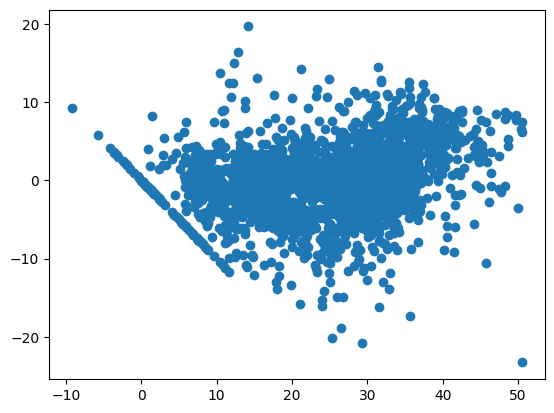

In [210]:
# Heteroscadacity
plt.scatter((y_pred_test_gb),(y_test)-(y_pred_test_gb))

### **Feature Importance**

In [211]:
gb_model.feature_importances_

array([3.21697773e-01, 1.28054219e-01, 5.06472446e-04, 4.41033341e-04,
       4.82210501e-02, 6.50977064e-02, 3.00825496e-05, 4.41679040e-04,
       6.20291012e-03, 1.54723207e-02, 2.77923448e-02, 2.09197623e-02,
       5.54914116e-03, 1.38849071e-03, 9.51964101e-03, 0.00000000e+00,
       2.87933226e-03, 1.37560679e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 4.08156531e-04, 7.57741782e-03,
       3.03117662e-02, 1.74699066e-02, 1.14240782e-02, 1.55664225e-02,
       1.20487441e-02, 2.45479420e-04, 1.42322866e-05, 0.00000000e+00,
       3.35174157e-02, 2.23294271e-03, 1.74747832e-01, 0.00000000e+00,
       1.72209214e-03, 9.33502112e-05, 2.82254756e-04, 4.18000398e-03,
       0.00000000e+00, 2.40837833e-03, 0.00000000e+00, 6.76468137e-03,
       5.12015005e-03, 2.89720073e-04, 1.79854096e-02])

In [212]:
importances = gb_model.feature_importances_
importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}
importance_df = pd.DataFrame(importance_dict)
print (importance_df)

                Feature  Feature Importance
0           Temperature            0.321698
1              Humidity            0.128054
2            Wind_speed            0.000506
3            Visibility            0.000441
4       Solar_Radiation            0.048221
5              Rainfall            0.065098
6              Snowfall            0.000030
7                Hour_1            0.000442
8                Hour_2            0.006203
9                Hour_3            0.015472
10               Hour_4            0.027792
11               Hour_5            0.020920
12               Hour_6            0.005549
13               Hour_7            0.001388
14               Hour_8            0.009520
15               Hour_9            0.000000
16              Hour_10            0.002879
17              Hour_11            0.001376
18              Hour_12            0.000000
19              Hour_13            0.000000
20              Hour_14            0.000000
21              Hour_15         

In [213]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [214]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0           Temperature                0.32
34  Functioning_Day_Yes                0.17
1              Humidity                0.13
5              Rainfall                0.07
4       Solar_Radiation                0.05
32       Seasons_Winter                0.03
24              Hour_18                0.03
10               Hour_4                0.03
11               Hour_5                0.02
27              Hour_21                0.02
25              Hour_19                0.02
46   weekdays_weekend_1                0.02
9                Hour_3                0.02
12               Hour_6                0.01
44             month_11                0.01
43             month_10                0.01
28              Hour_22                0.01
26              Hour_20                0.01
8                Hour_2                0.01
23              Hour_17                0.01
14               Hour_8                0.01
20              Hour_14                0.00
2            Wind_speed                0.00
45             month_12                0.00
15               Hour_9                0.00
42              month_9                0.00
41              month_8                0.00
40              month_7                0.00
39              month_6                0.00
38              month_5                0.00
37              month_4                0.00
36              month_3                0.00
35              month_2                0.00
33   Holiday_No Holiday                0.00
21              Hour_15                0.00
3            Visibility                0.00
31       Seasons_Summer                0.00
30       Seasons_Spring                0.00
13               Hour_7                0.00
16              Hour_10                0.00
6              Snowfall                0.00
17              Hour_11                0.00
7                Hour_1                0.00
18              Hour_12                0.00
19              Hour_13                0.00
22              Hour_16                0.00
29              Hour_23                0.00

In [215]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

In [216]:
#Plot the figure
plt.figure(figsize=(10,10))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='green', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

## **Hyperparameter Tuning**

Before proceding to try next models, let us try to tune some hyperparameters and see if the performance of our model improves.

Hyperparameter tuning is the process of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a model argument whose value is set before the learning process begins. The key to machine learning algorithms is hyperparameter tuning.

**Using GridSearchCV**

GridSearchCV helps to loop through predefined hyperparameters and fit the model on the training set. So, in the end, we can select the best parameters from the listed hyperparameters.

### **Gradient Boosting Regressor with GridSearchCV**

**Provide the range of values for chosen hyperparameters**

In [217]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [218]:
param_dict

{'n_estimators': [50, 80, 100],
 'max_depth': [4, 6, 8],
 'min_samples_split': [50, 100, 150],
 'min_samples_leaf': [40, 50]}

In [219]:
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)
gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.5s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.8s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [220]:
gb_grid.best_estimator_
gb_optimal_model = gb_grid.best_estimator_
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 40,
 'min_samples_split': 50,
 'n_estimators': 100}

In [221]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [222]:
#Predicting train and test data
y_pred_train_gb_gcv = gb_optimal_model.predict(X_train)
y_pred_test_gb_gcv= gb_optimal_model.predict(X_test)

In [223]:
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh_gcv= mean_squared_error(y_train, y_pred_train_gb_gcv)
print("MSE :",MSE_gbh_gcv)

RMSE_gbh_gcv=np.sqrt(MSE_gbh_gcv)
print("RMSE :",RMSE_gbh_gcv)

MAE_gbh_gcv= mean_absolute_error(y_train, y_pred_train_gb_gcv)
print("MAE :",MAE_gbh_gcv)

r2_gbh_gcv= r2_score(y_train, y_pred_train_gb_gcv)
print("R2 :",r2_gbh_gcv)
Adjusted_r2_gbh_gcv = (1-(1-r2_score(y_train, y_pred_train_gb_gcv))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_gb_gcv))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

Model Score: 0.9515896672300013
MSE : 7.454740004128374
RMSE : 2.7303369762958516
MAE : 1.8489194833919358
R2 : 0.9515896672300013
Adjusted R2 : 0.9505274423746372


The r2 score value is 0.95 using hyperparameter tuned gradient boosting model and that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [224]:
# storing the training set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh_gcv),3),
       'MSE':round((MSE_gbh_gcv),3),
       'RMSE':round((RMSE_gbh_gcv),3),
       'R2_score':round((r2_gbh_gcv),3),
       'Adjusted R2':round((Adjusted_r2_gbh_gcv),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [225]:
MSE_gbh_gcv= mean_squared_error(y_test, y_pred_test_gb_gcv)
print("MSE :",MSE_gbh_gcv)

RMSE_gbh_gcv=np.sqrt(MSE_gbh_gcv)
print("RMSE :",RMSE_gbh_gcv)

MAE_gbh_gcv= mean_absolute_error(y_test, y_pred_test_gb_gcv)
print("MAE :",MAE_gbh_gcv)

r2_gbh_gcv= r2_score((y_test), (y_pred_test_gb_gcv))
print("R2 :",r2_gbh_gcv)
Adjusted_r2_gbh_gcv = (1-(1-r2_score(y_test, y_pred_test_gb_gcv))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_gb_gcv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 12.393403249345436
RMSE : 3.5204265720712646
MAE : 2.4007407956878812
R2 : 0.921544056287242
Adjusted R2 : 0.9198225673262245


The r2_score for the test set is 0.92. This means our linear model is performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [226]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh_gcv),3),
       'MSE':round((MSE_gbh_gcv),3),
       'RMSE':round((RMSE_gbh_gcv),3),
       'R2_score':round((r2_gbh_gcv),3),
       'Adjusted R2':round((Adjusted_r2_gbh_gcv),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

In [227]:
# Heteroscadacity
plt.scatter((y_pred_test_gb_gcv),(y_test)-(y_pred_test_gb_gcv))

### **Feature Importance**

In [228]:
gb_optimal_model.feature_importances_

array([3.12057438e-01, 1.52960270e-01, 6.20316780e-03, 6.03743312e-03,
       3.75324776e-02, 4.41384879e-02, 1.25380735e-03, 9.51937002e-04,
       9.98653930e-03, 1.96911560e-02, 2.89529919e-02, 2.45449359e-02,
       6.18872117e-03, 3.32550727e-03, 1.20634772e-02, 4.66509851e-04,
       3.73626049e-03, 2.06003352e-03, 6.36119042e-05, 1.39325973e-04,
       9.77140091e-05, 5.27337742e-04, 1.33847427e-03, 9.51593158e-03,
       3.11372494e-02, 1.65223193e-02, 1.21776066e-02, 1.44682226e-02,
       9.91879886e-03, 2.41023598e-03, 3.62345860e-03, 1.06796008e-03,
       1.63029331e-02, 2.18064007e-03, 1.57198472e-01, 7.75938658e-05,
       1.32320249e-03, 1.09973153e-04, 1.66051097e-03, 2.73793528e-03,
       1.57135470e-03, 6.25546517e-03, 7.62045639e-05, 6.35447256e-03,
       4.56464936e-03, 1.05534757e-03, 2.33718468e-02])

In [229]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [230]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [231]:
importance_df.head()

Feature  Feature Importance
0      Temperature                0.31
1         Humidity                0.15
2       Wind_speed                0.01
3       Visibility                0.01
4  Solar_Radiation                0.04

In [232]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0           Temperature                0.31
34  Functioning_Day_Yes                0.16
1              Humidity                0.15
4       Solar_Radiation                0.04
5              Rainfall                0.04
10               Hour_4                0.03
24              Hour_18                0.03
32       Seasons_Winter                0.02
25              Hour_19                0.02
11               Hour_5                0.02
46   weekdays_weekend_1                0.02
9                Hour_3                0.02
8                Hour_2                0.01
43             month_10                0.01
41              month_8                0.01
2            Wind_speed                0.01
3            Visibility                0.01
12               Hour_6                0.01
28              Hour_22                0.01
27              Hour_21                0.01
26              Hour_20                0.01
23              Hour_17                0.01
14               Hour_8                0.01
22              Hour_16                0.00
35              month_2                0.00
45             month_12                0.00
44             month_11                0.00
13               Hour_7                0.00
42              month_9                0.00
40              month_7                0.00
39              month_6                0.00
38              month_5                0.00
37              month_4                0.00
36              month_3                0.00
15               Hour_9                0.00
21              Hour_15                0.00
33   Holiday_No Holiday                0.00
16              Hour_10                0.00
31       Seasons_Summer                0.00
30       Seasons_Spring                0.00
17              Hour_11                0.00
18              Hour_12                0.00
19              Hour_13                0.00
20              Hour_14                0.00
6              Snowfall                0.00
7                Hour_1                0.00
29              Hour_23                0.00

In [233]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

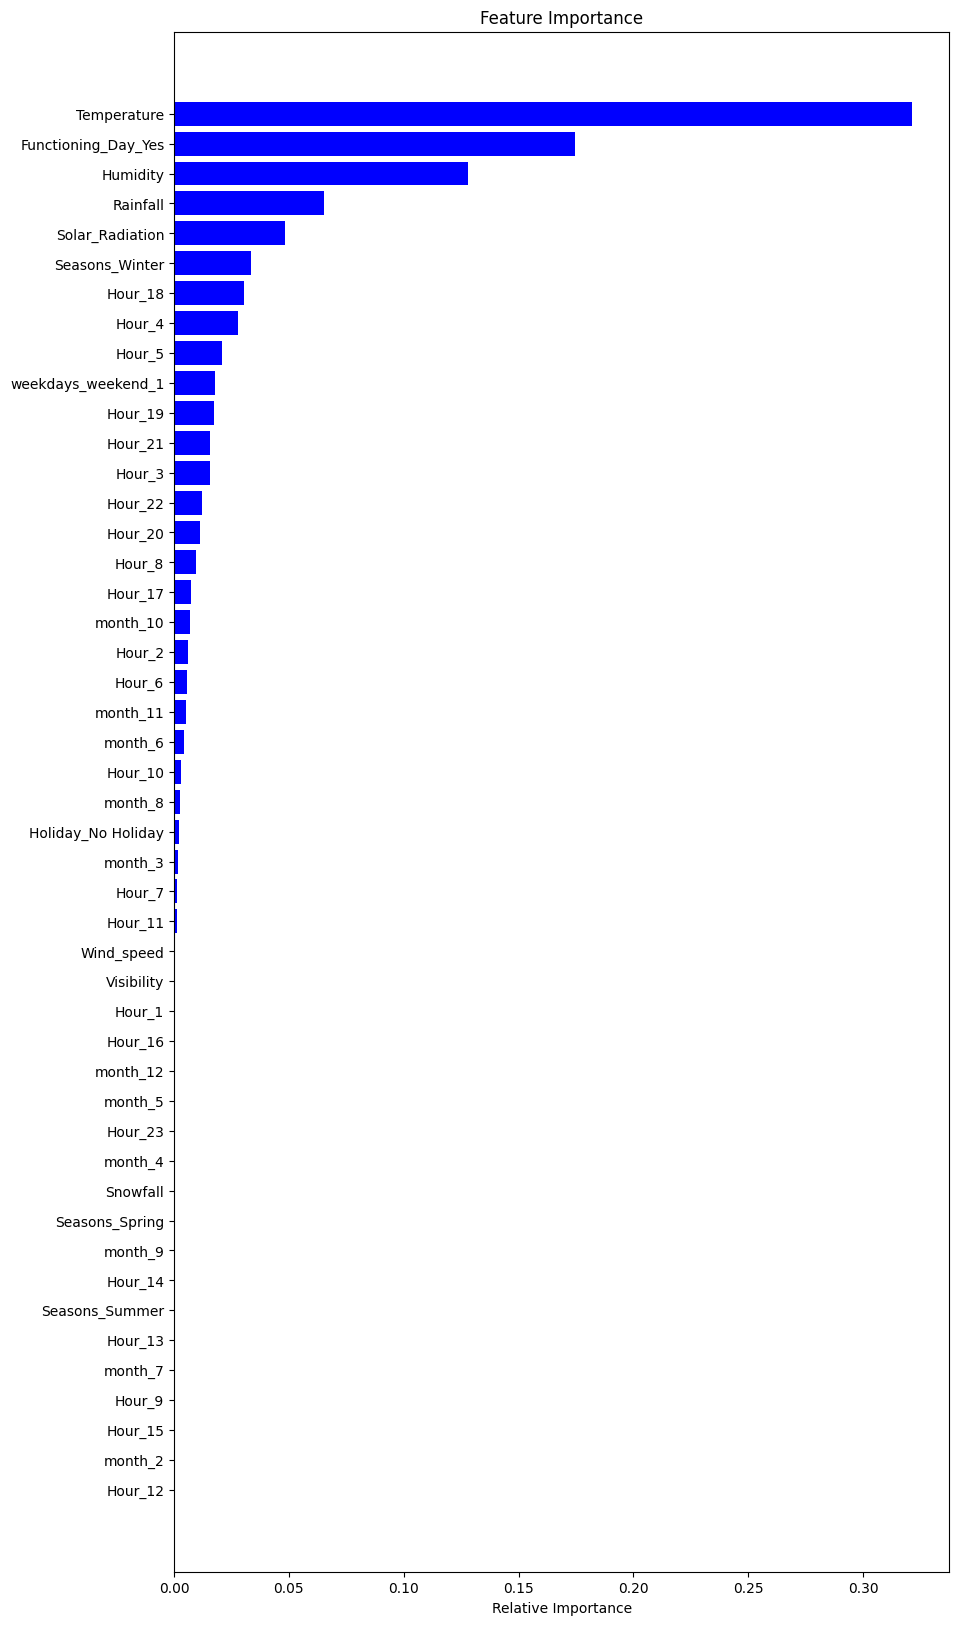

In [234]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **Results and Conclusion**

## **Results**

The results of our evaluation are as follows:

In [235]:
# displaying the results of evaluation metric values for all models
result=pd.concat([training_df,test_df],keys=['Training set','Test set'])
result

Model    MAE     MSE   RMSE  \
Training set 0               Linear regression   4.474  35.078  5.923   
             1                Lasso regression   7.255  91.594  9.570   
             2                Ridge regression   4.474  35.078  5.923   
             3          Elastic net regression   5.792  57.574  7.588   
             4        Dicision tree regression   6.138  76.349  8.738   
             5        Random forest regression   0.803   1.575  1.255   
             6    Gradient boosting regression   3.269  18.648  4.318   
             7  Gradient Boosting gridsearchcv   1.849   7.455  2.730   
Test set     0               Linear regression   4.410  33.275  5.768   
             1                Lasso regression   7.456  96.775  9.837   
             2                Ridge regression   4.410  33.277  5.769   
             3          Elastic net regression   5.874  59.451  7.710   
             4        Dicision tree regression   6.694  90.186  9.497   
             5        Random forest regression   2.201  12.535  3.541   
             6    Gradient boosting regression   3.493  21.289  4.614   
             7  Gradient Boosting gridsearchcv   2.401  12.393  3.520   

                R2_score  Adjusted R2  
Training set 0     0.772         0.77  
             1     0.405         0.39  
             2     0.772         0.77  
             3     0.626         0.62  
             4     0.504         0.49  
             5     0.990         0.99  
             6     0.879         0.88  
             7     0.952         0.95  
Test set     0     0.789         0.78  
             1     0.387         0.37  
             2     0.789         0.78  
             3     0.624         0.62  
             4     0.429         0.42  
             5     0.921         0.92  
             6     0.865         0.86  
             7     0.922         0.92

## **Conclusions**